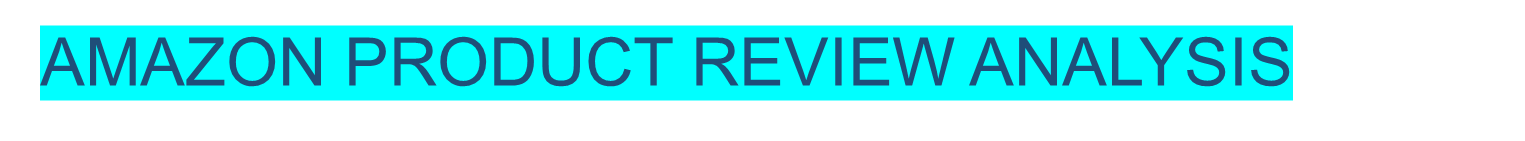

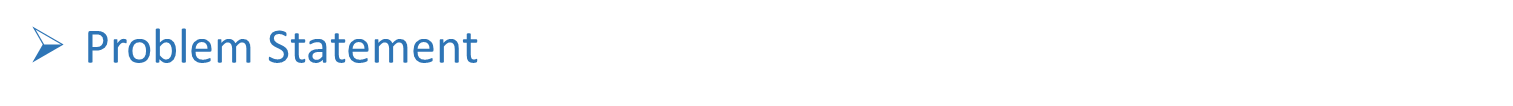

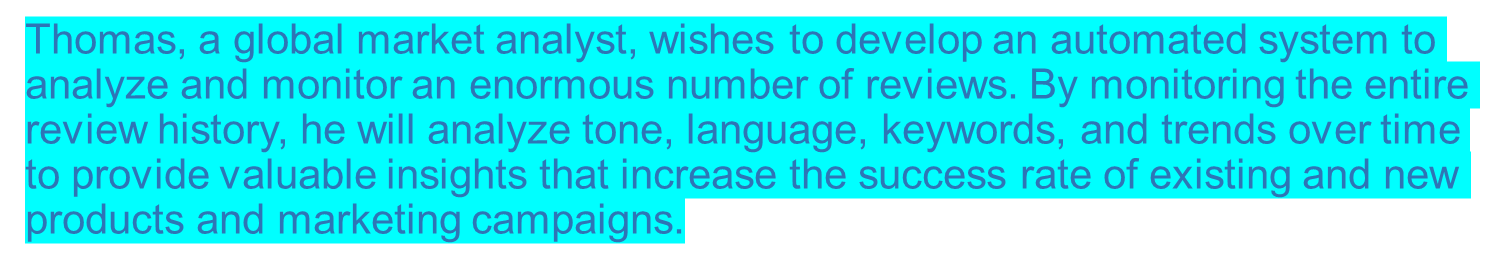

## STEPS INVOLVED:
- PREPROCESSING AND CLEANING  
- EXPLORATORY DATA  ANALYSIS  ( TABLEAU )  
- SENTIMENT ANALYSIS  
- TEXT CLASSIFICATION  
- CLUSTERING 
- TIME SERIES ANALYSIS 

## MOUNTING DRIVE

In [1]:
"""# Mounting google drive
from google.colab import drive
drive.mount('/content/gdrive')"""

"# Mounting google drive\nfrom google.colab import drive\ndrive.mount('/content/gdrive')"

## IMPORTING LIBRARIES

In [1]:
import json                                        # to work with json file
import pandas as pd                                # to work with dataframes
import numpy as np                                 # to work with numpy arrays
import gzip                                        # to extract work file from zip file
import nltk                                        # working with nlp algorithms
from nltk.sentiment import SentimentIntensityAnalyzer  # To predict the sentiments based on the text
from tqdm.notebook import tqdm                     # library for adding progress bar
import sklearn                                     # to working with machine learning algorithms
from sklearn.linear_model import LogisticRegression  # Classification algorithm
from sklearn.feature_extraction.text import TfidfVectorizer # To convert text to numerical based on tfidf score
from nltk.corpus import stopwords                  # to detect stopwords
import re                                          # To remove the unwanted text
from sklearn.metrics import classification_report  # Classification report
from sklearn.metrics import accuracy_score         # evaluation metric
from sklearn.metrics import f1_score               # evaluation metric
from sklearn.metrics import recall_score           # evaluation metric
from sklearn.metrics import precision_score        # evaluation metric
from sklearn.model_selection import train_test_split # train test split
from sklearn.preprocessing import LabelEncoder     # To convert categorical to numerical
import warnings
warnings.filterwarnings('ignore')                  # To ignore the warnings
from sklearn.naive_bayes import MultinomialNB       # Naive bayes algorithm
import matplotlib.pyplot as plt                     # Visualization tool
import seaborn as sns                               # Visualization tool
from statsmodels.tsa.seasonal import seasonal_decompose            # Time series components
from statsmodels.tsa.stattools import adfuller                      # To find the stationarity of the data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf       # To plot ACF and PACF plots
from statsmodels.tsa.arima.model import ARIMA                       # To build the ARIMA model                                  
from statsmodels.tsa.statespace.sarimax import SARIMAX              # To build the sarimax model
from sklearn.preprocessing import MinMaxScaler, StandardScaler      # For Scaling the data
from sklearn.cluster import KMeans                                  # For Cluster Formation  
from sklearn.feature_extraction.text import CountVectorizer         # For Vectorisation
from wordcloud import WordCloud, STOPWORDS                          # For Word Cloud
from sklearn import metrics                                         # For Matrics Algorithms
from sklearn.metrics import confusion_matrix                        # It shows the tabel of probability values
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

## CONVERTING THE FILE FROM JSON TO DATAFRAME

In [2]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

In [3]:
df = getDF(r"C:\Users\patel\Downloads\Compressed\meta_All_Beauty.json.gz")
df.head(3)

category tech1                                        description fit  \
0       []        [Loud 'N Clear Personal Sound Amplifier allows...       
1       []        [No7 Lift & Luminate Triple Action Serum 50ml ...       
2       []        [No7 Stay Perfect Foundation now stays perfect...       

                                               title  \
0      Loud 'N Clear&trade; Personal Sound Amplifier   
1  No7 Lift &amp; Luminate Triple Action Serum 50...   
2    No7 Stay Perfect Foundation Cool Vanilla by No7   

                   also_buy tech2         brand feature  \
0                        []        idea village      []   
1  [B01E7LCSL6, B008X5RVME]                          []   
2                        []                 No7      []   

                                    rank  \
0  2,938,573 in Beauty & Personal Care (   
1    872,854 in Beauty & Personal Care (   
2    956,696 in Beauty & Personal Care (   

                              also_view  \
0                                    []   
1                                    []   
2  [B01B8BR0O8, B01B8BR0NO, B014MHXXM8]   

                                             details    main_cat  \
0                           {'ASIN: ': '6546546450'}  All Beauty   
1  {'Shipping Weight:': '0.3 ounces (', 'ASIN: ':...  All Beauty   
2  {'Shipping Weight:': '3.5 ounces (', 'ASIN: ':...  All Beauty   

                                        similar_item date   price        asin  \
0                                                                  6546546450   
1   class="a-bordered a-horizontal-stripes  a-spa...       $44.99  7178680776   
2                                                          $28.76  7250468162   

  imageURL imageURLHighRes  
0       []              []  
1       []              []  
2       []              []

In [4]:
df1 = getDF(r"C:\Users\patel\Downloads\Compressed\All_Beauty.json.gz")
df1.head(3)

overall  verified   reviewTime      reviewerID        asin  \
0      1.0      True  02 19, 2015  A1V6B6TNIC10QE  0143026860   
1      4.0      True  12 18, 2014  A2F5GHSXFQ0W6J  0143026860   
2      4.0      True  08 10, 2014  A1572GUYS7DGSR  0143026860   

        reviewerName                                         reviewText  \
0  theodore j bigham                                              great   
1       Mary K. Byke  My  husband wanted to reading about the Negro ...   
2            David G  This book was very informative, covering all a...   

                                             summary  unixReviewTime vote  \
0                                           One Star      1424304000  NaN   
1  ... to reading about the Negro Baseball and th...      1418860800  NaN   
2                                     Worth the Read      1407628800  NaN   

  style image  
0   NaN   NaN  
1   NaN   NaN  
2   NaN   NaN

### Checking shape

In [5]:
print('Rows in meta dataset :','\t',df.shape[0],'\n')
print('Columns in meta dataset :','\t',df.shape[1])

Rows in meta dataset : 	 32892 

Columns in meta dataset : 	 19


In [6]:
print('Rows in reviews dataset :','\t',df1.shape[0],'\n')
print('Columns in reviews dataset :','\t',df1.shape[1])

Rows in reviews dataset : 	 371345 

Columns in reviews dataset : 	 12


### Feature selection for data1

In [7]:
data1 = df1[['asin', 'reviewText','reviewerName', 'overall', 'unixReviewTime', 'reviewTime', 'verified', 'summary']]

### Feature selection for data2

In [8]:
data2 = df[['asin', 'title', 'price', 'brand']]
data2.head()

asin                                              title   price  \
0  6546546450      Loud 'N Clear&trade; Personal Sound Amplifier           
1  7178680776  No7 Lift &amp; Luminate Triple Action Serum 50...  $44.99   
2  7250468162    No7 Stay Perfect Foundation Cool Vanilla by No7  $28.76   
3  7367905066  Wella Koleston Perfect Hair Colour 44/44 Mediu...           
4  7414204790  Lacto Calamine Skin Balance Oil control 120 ml...  $12.15   

               brand  
0       idea village  
1                     
2                No7  
3                     
4  Pirmal Healthcare

### Merging the data set

In [9]:
H_data = pd.merge(data1, data2, on = 'asin')
H_data.head(3)

asin           reviewText     reviewerName  overall  unixReviewTime  \
0  7414204790  Excellent very good  Amazon Customer      5.0      1457568000   
1  7414204790        Great product               LH      5.0      1441065600   
2  7414204790              Magical            dolly      5.0      1412294400   

    reviewTime  verified     summary  \
0  03 10, 2016      True  Five Stars   
1   09 1, 2015      True  Five Stars   
2   10 3, 2014      True  Five Stars   

                                               title   price  \
0  Lacto Calamine Skin Balance Oil control 120 ml...  $12.15   
1  Lacto Calamine Skin Balance Oil control 120 ml...  $12.15   
2  Lacto Calamine Skin Balance Oil control 120 ml...  $12.15   

               brand  
0  Pirmal Healthcare  
1  Pirmal Healthcare  
2  Pirmal Healthcare

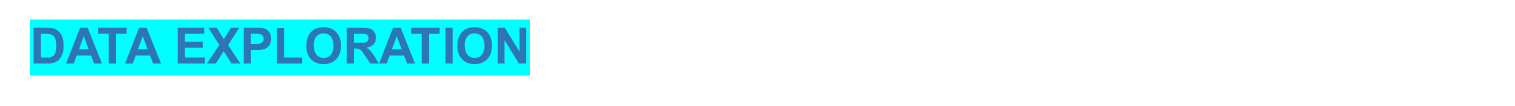

### Checking Shape of dataset

In [10]:
print('Rows in h_data dataset :','\t',H_data.shape[0],'\n')
print('Columns in h_data dataset :','\t',H_data.shape[1])

Rows in h_data dataset : 	 382532 

Columns in h_data dataset : 	 11


### Checking description

In [11]:
H_data.describe()

overall  unixReviewTime
count  382532.000000    3.825320e+05
mean        4.109175    1.438456e+09
std         1.363348    7.351667e+07
min         1.000000    9.727776e+08
25%         4.000000    1.413504e+09
50%         5.000000    1.456445e+09
75%         5.000000    1.485475e+09
max         5.000000    1.538438e+09

### Checking information of dataset

In [12]:
H_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382532 entries, 0 to 382531
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   asin            382532 non-null  object 
 1   reviewText      382132 non-null  object 
 2   reviewerName    382493 non-null  object 
 3   overall         382532 non-null  float64
 4   unixReviewTime  382532 non-null  int64  
 5   reviewTime      382532 non-null  object 
 6   verified        382532 non-null  bool   
 7   summary         382320 non-null  object 
 8   title           382532 non-null  object 
 9   price           382532 non-null  object 
 10  brand           382532 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(8)
memory usage: 32.5+ MB


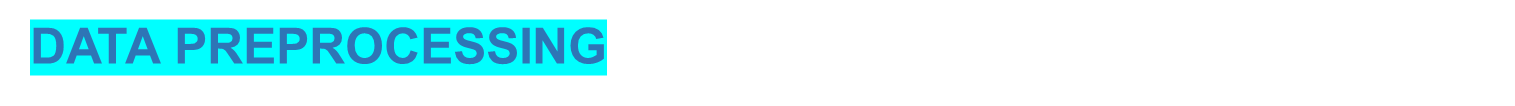

### Removing the duplicates

In [13]:
H_data.drop_duplicates(["reviewText","asin","reviewerName"], keep = "last", inplace = True)

### Replace blank spaces with Nan 

In [14]:
H_data.replace('', np.nan, inplace=True)

### Checking null values

In [15]:
H_data.isnull().sum()

asin                   0
reviewText           387
reviewerName          38
overall                0
unixReviewTime         0
reviewTime             0
verified               0
summary              204
title                 16
price             174246
brand              86749
dtype: int64

### Create def function for remove $ sign and impute Nan with median value in price column.

In [16]:
def convert_price(val):
    try:
        return float(val.replace('$', ''))
    except:
        return np.nan

H_data['price'] = H_data['price'].apply(convert_price)

median_price = H_data['price'].median()

H_data['price'] = H_data['price'].fillna(median_price)

### Replace Nan with unknown in brand column

In [17]:
H_data['brand'] = H_data['brand'].fillna('unknown')

### Checking null values

In [18]:
H_data.isnull().sum()

asin                0
reviewText        387
reviewerName       38
overall             0
unixReviewTime      0
reviewTime          0
verified            0
summary           204
title              16
price               0
brand               0
dtype: int64

### Drop remaining Nan from other columns and again check null values

In [19]:
H_data.dropna(inplace = True)

In [20]:
H_data.isnull().sum()

asin              0
reviewText        0
reviewerName      0
overall           0
unixReviewTime    0
reviewTime        0
verified          0
summary           0
title             0
price             0
brand             0
dtype: int64

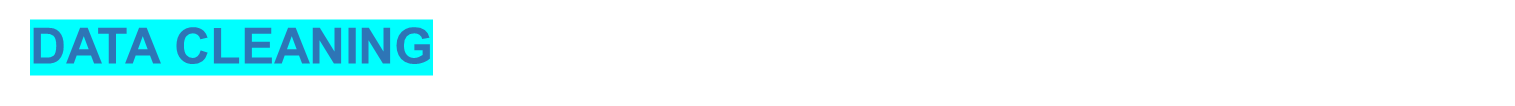

### Creating cleaning function

In [21]:
def cleaning(text):
    # Replace any non-alphanumeric characters (except for hyphens) with a space character
    text = re.sub("[^0-9A-Za-z\-]+", " ", text) 
    
    # Replace any digits that are not immediately preceded by a word character with an empty string
    text = re.sub("(?<!\w)\d+", "", text)
    
    # Replace any hyphens that are not immediately followed by a word character with an empty string
    text = re.sub("-(?!\w)", "", text)
    
    # Split the text into words using whitespace as a delimiter, remove any leading/trailing whitespace, and join the words back together with a single space character between each word
    text = " ".join(text.split())
    
    # Convert all characters in the text to lowercase
    text = text.lower()
    
    # Return the cleaned text string
    return text

In [22]:
H_data["reviewText"] = H_data["reviewText"].apply(cleaning)

### Remove stop words

In [23]:
nltk.download('stopwords')
stop_word = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
H_data['reviewText'] = H_data['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_word)]))

### Checking Information

In [25]:
H_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356754 entries, 0 to 382531
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   asin            356754 non-null  object 
 1   reviewText      356754 non-null  object 
 2   reviewerName    356754 non-null  object 
 3   overall         356754 non-null  float64
 4   unixReviewTime  356754 non-null  int64  
 5   reviewTime      356754 non-null  object 
 6   verified        356754 non-null  bool   
 7   summary         356754 non-null  object 
 8   title           356754 non-null  object 
 9   price           356754 non-null  float64
 10  brand           356754 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(7)
memory usage: 30.3+ MB


### converting the data type of reviewTime with date type

In [26]:
H_data['reviewTime'] = pd.to_datetime(H_data['reviewTime'])

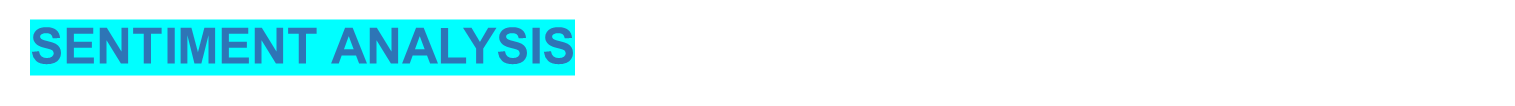

### Positive, Negative and Neutral Sentiment

In [27]:
a=[]
for x in H_data['overall']: 
  if x>3:
    x='Positive'
    a.append(x)
  elif x==3:
    x='Neutral'
    a.append(x)
  else:
    x='Negative'
    a.append(x)

In [28]:
H_data['Sentiment']=a

### Plot bar chart for Positive, Negative and Neutral Sentiment

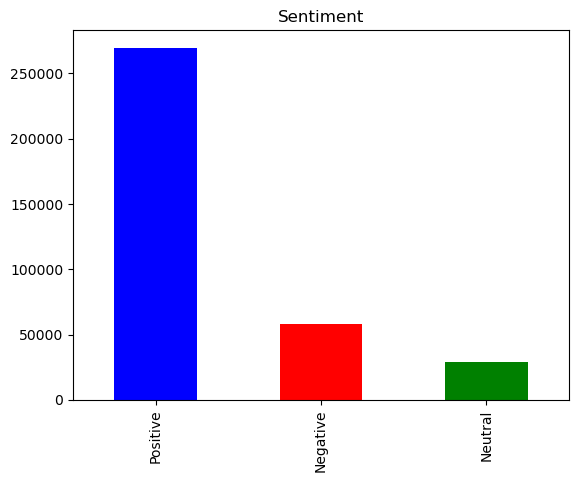

In [29]:
colors = ['blue', 'red', 'green']

H_data.Sentiment.value_counts().plot.bar(color=colors)

plt.title('Sentiment');

### VADER
- VADER ( Valence Aware Dictionary for Sentiment Reasoning) is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. It is available in the NLTK package and can be applied directly to unlabeled text data.

In [30]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\patel\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

###  Getting the polarity of reviewText 

In [31]:
res2 = {}
t = 0
for i, row in tqdm(H_data.iterrows(), total=len(H_data)):
    text = row['reviewText']
    res2[t] = SentimentIntensityAnalyzer().polarity_scores(text)
    t = t + 1

  0%|          | 0/356754 [00:00<?, ?it/s]

In [32]:
j = pd.DataFrame(res2).T
j

neg    neu    pos  compound
0       0.000  0.000  1.000    0.7650
1       0.000  0.196  0.804    0.6249
2       0.000  1.000  0.000    0.0000
3       0.000  0.000  1.000    0.5719
4       0.103  0.517  0.379    0.5859
...       ...    ...    ...       ...
356749  0.083  0.606  0.311    0.6124
356750  0.118  0.647  0.235    0.7096
356751  0.082  0.474  0.444    0.7282
356752  0.000  0.887  0.113    0.3182
356753  0.247  0.404  0.350    0.3182

[356754 rows x 4 columns]

###  concating the main data and the Polarity Scores

In [33]:
M_data = pd.concat([H_data, j], axis = 1)

In [34]:
M_data.dropna(inplace = True)

In [35]:
M_data.insert(0, 'Class', np.nan)
M_data.loc[M_data['compound']>=0.05, 'Class'] = 'positive'
M_data.loc[M_data['compound']<=-0.05, 'Class'] = 'negative'
M_data.loc[((M_data['compound'] > -0.05) & (M_data['compound'] < 0.05)), 'Class'] = 'neutral'

### giving the datetiem index for reviewtime on the basis of year and month


In [36]:
M_data['year'] = pd.DatetimeIndex(M_data['reviewTime']).year
M_data['month'] = pd.DatetimeIndex(M_data['reviewTime']).month

In [37]:
M_data.head(2)

Class        asin      reviewText     reviewerName  overall  \
0  positive  7414204790  excellent good  Amazon Customer      5.0   
1  positive  7414204790   great product               LH      5.0   

   unixReviewTime reviewTime verified     summary  \
0    1.457568e+09 2016-03-10     True  Five Stars   
1    1.441066e+09 2015-09-01     True  Five Stars   

                                               title  price  \
0  Lacto Calamine Skin Balance Oil control 120 ml...  12.15   
1  Lacto Calamine Skin Balance Oil control 120 ml...  12.15   

               brand Sentiment  neg    neu    pos  compound  year  month  
0  Pirmal Healthcare  Positive  0.0  0.000  1.000    0.7650  2016      3  
1  Pirmal Healthcare  Positive  0.0  0.196  0.804    0.6249  2015      9

### converting the data into CSV file

In [39]:
#M_data.to_csv("B.csv",index=False)

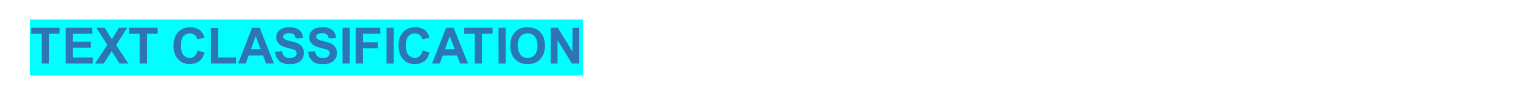

### Read the data

In [38]:
df = pd.read_csv("B.csv")
df.head(2)

Class        asin      reviewText     reviewerName  overall  \
0  positive  7414204790  excellent good  Amazon Customer      5.0   
1  positive  7414204790   great product               LH      5.0   

   unixReviewTime  reviewTime  verified     summary  \
0    1.457568e+09  2016-03-10      True  Five Stars   
1    1.441066e+09  2015-09-01      True  Five Stars   

                                               title  price  \
0  Lacto Calamine Skin Balance Oil control 120 ml...  12.15   
1  Lacto Calamine Skin Balance Oil control 120 ml...  12.15   

               brand Sentiment  neg    neu    pos  compound  year  month  
0  Pirmal Healthcare  Positive  0.0  0.000  1.000    0.7650  2016      3  
1  Pirmal Healthcare  Positive  0.0  0.196  0.804    0.6249  2015      9

### Converting the datatype of reviewTime to Date type

In [39]:
df["reviewTime"] = pd.to_datetime(df["reviewTime"])

### checking null values

In [40]:
df.isnull().sum()              

Class               0
asin                0
reviewText        397
reviewerName       13
overall             0
unixReviewTime      0
reviewTime          0
verified            0
summary             5
title               0
price               0
brand              15
Sentiment           0
neg                 0
neu                 0
pos                 0
compound            0
year                0
month               0
dtype: int64

### Drop null values and again check null values 

In [41]:
df.dropna(inplace=True)

In [42]:
df.isnull().sum()

Class             0
asin              0
reviewText        0
reviewerName      0
overall           0
unixReviewTime    0
reviewTime        0
verified          0
summary           0
title             0
price             0
brand             0
Sentiment         0
neg               0
neu               0
pos               0
compound          0
year              0
month             0
dtype: int64

### For WordCloud

In [43]:
stopwords = set(STOPWORDS)

def word_cloud(data, title):
    wordcloud = WordCloud(
    background_color = "white",
    max_font_size = 40,
    max_words = 200,
    stopwords = stopwords,
    scale = 3).generate(str(data))
    fig = plt.figure(figsize = (15, 15))
    plt.axis("off")
    if title: 
        fig.suptitle(title, fontsize=15)
        fig.subplots_adjust(top=2.25)
    plt.imshow(wordcloud)
    plt.show()

In [44]:
neg=df[df["Sentiment"] == "Negative"]["reviewText"]
pos=df[df["Sentiment"] == "Positive"]["reviewText"]
neu=df[df["Sentiment"] == "Neutral"]["reviewText"]

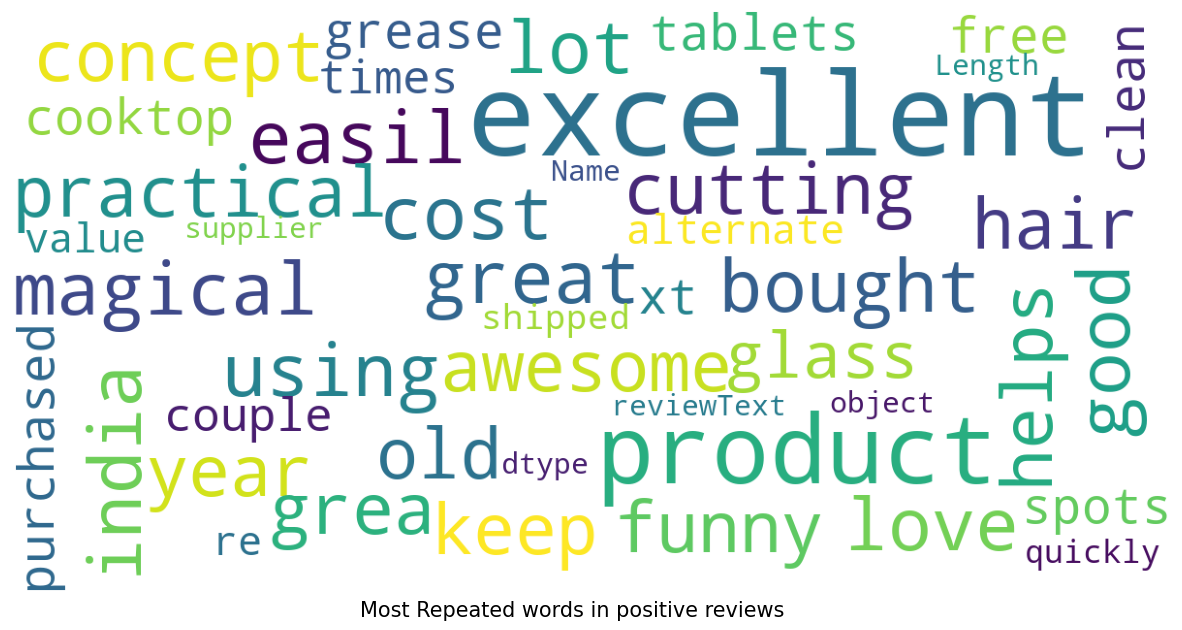

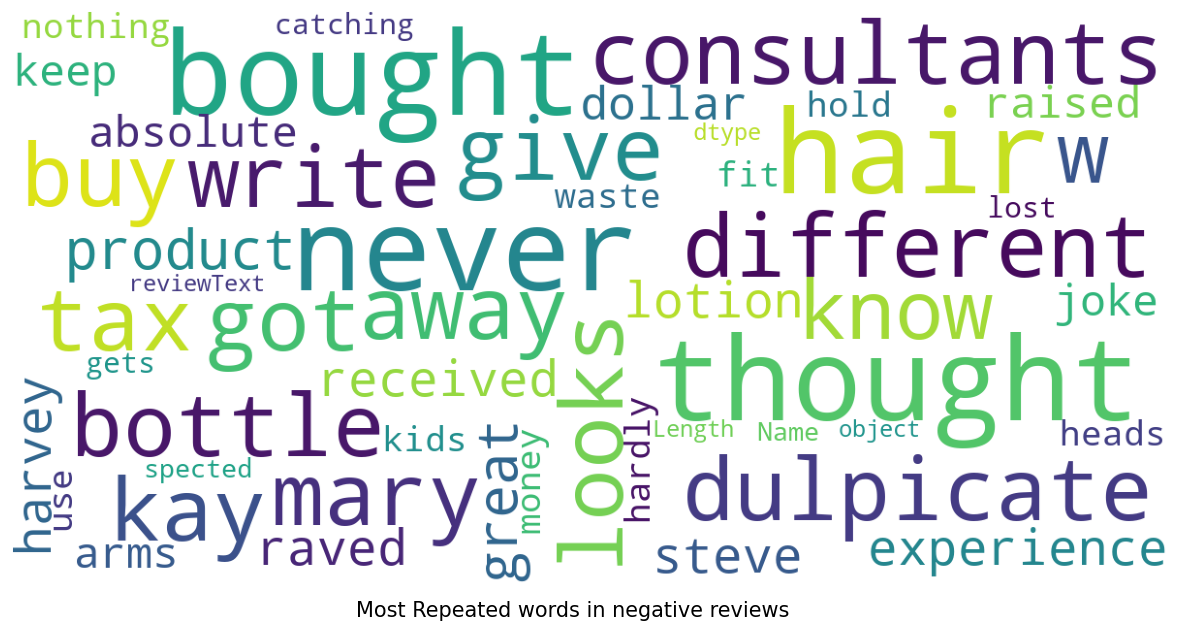

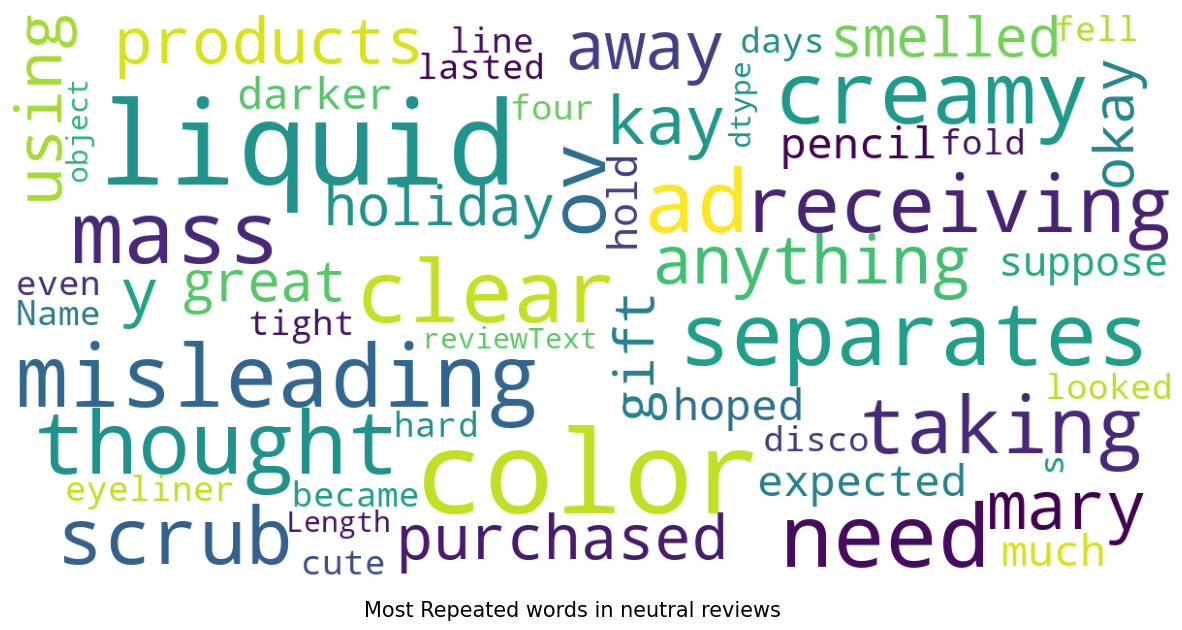

In [45]:
word_cloud(pos, "Most Repeated words in positive reviews")
word_cloud(neg, "Most Repeated words in negative reviews")
word_cloud(neu, "Most Repeated words in neutral reviews")

### TF-IDF (Term Frequency-Inverse Document Frequency)

In [46]:
X = df['reviewText']
Y = df['Sentiment']

In [47]:
Y.value_counts()

Positive    250739
Negative     53103
Neutral      26780
Name: Sentiment, dtype: int64

### LableEncoding

In [48]:
le = LabelEncoder()

Y = le.fit_transform(Y)

### Split the dataframe into train and test.

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Applying TFIDF Vectorizer

In [50]:
myvector = TfidfVectorizer()
X_train = myvector.fit_transform(X_train)
X_test = myvector.transform(X_test)

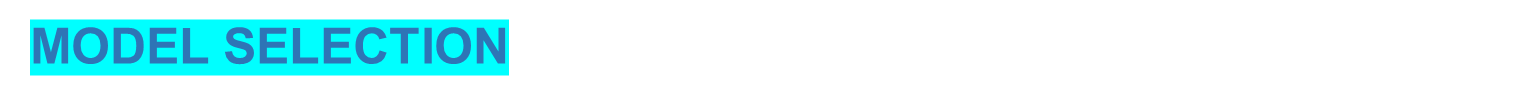

### LOGISTIC REGRESSION

In [51]:
lr1 = LogisticRegression(max_iter=200, verbose = 1)
ovr = OneVsRestClassifier(lr1)

# fit the model
ovr.fit(X_train,Y_train)
y_pred = ovr.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s finished


In [52]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, accuracy_score

# Confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# F1 score
f1 = f1_score(Y_test, y_pred, average='weighted')

# Precision
precision = precision_score(Y_test, y_pred, average='weighted')

# Accuracy
accuracy = accuracy_score(Y_test, y_pred)

print("Confusion Matrix:\n", cm,'\n')
print("F1 score: {:.2f}\n".format(f1))
print("Precision: {:.2f}\n".format(precision))
print("Accuracy: {:.2f}\n".format(accuracy))

Confusion Matrix:
 [[ 7177   249  3277]
 [ 1298   494  3489]
 [ 1146   361 48634]] 

F1 score: 0.83

Precision: 0.82

Accuracy: 0.85



In [53]:
print(classification_report(Y_test, y_pred, target_names = df.Sentiment.value_counts().index))

              precision    recall  f1-score   support

    Positive       0.75      0.67      0.71     10703
    Negative       0.45      0.09      0.15      5281
     Neutral       0.88      0.97      0.92     50141

    accuracy                           0.85     66125
   macro avg       0.69      0.58      0.59     66125
weighted avg       0.82      0.85      0.83     66125



### NAIVE BAYES CLASSIFIER

In [54]:
model2 = MultinomialNB().fit(X_train, Y_train)
y_pred2 = model2.predict(X_test)

In [55]:
# Confusion matrix
cm = confusion_matrix(Y_test, y_pred2)

# F1 score
f1 = f1_score(Y_test, y_pred2, average='weighted')

# Precision
precision = precision_score(Y_test, y_pred2, average='weighted')

# Accuracy
accuracy = accuracy_score(Y_test, y_pred2)

print("Confusion Matrix:\n", cm,'\n')
print("F1 score: {:.2f}\n".format(f1))
print("Precision: {:.2f}\n".format(precision))
print("Accuracy: {:.2f}\n".format(accuracy))

Confusion Matrix:
 [[ 2366     1  8336]
 [  179     7  5095]
 [  105     5 50031]] 

F1 score: 0.73

Precision: 0.79

Accuracy: 0.79



In [56]:
print(classification_report(Y_test, y_pred2, target_names = df.Sentiment.value_counts().index))

              precision    recall  f1-score   support

    Positive       0.89      0.22      0.35     10703
    Negative       0.54      0.00      0.00      5281
     Neutral       0.79      1.00      0.88     50141

    accuracy                           0.79     66125
   macro avg       0.74      0.41      0.41     66125
weighted avg       0.79      0.79      0.73     66125



### DECISION TREE CLASSIFIER

In [57]:
model1 = DecisionTreeClassifier().fit(X_train, Y_train)
y_pred1 = model1.predict(X_test)

In [58]:
# Confusion matrix
cm = confusion_matrix(Y_test, y_pred1)

# F1 score
f1 = f1_score(Y_test, y_pred1, average='weighted')

# Precision
precision = precision_score(Y_test, y_pred1, average='weighted')

# Accuracy
accuracy = accuracy_score(Y_test, y_pred1)

print("Confusion Matrix:\n", cm,'\n')
print("F1 score: {:.2f}\n".format(f1))
print("Precision: {:.2f}\n".format(precision))
print("Accuracy: {:.2f}\n".format(accuracy))

Confusion Matrix:
 [[ 6192  1078  3433]
 [ 1369  1087  2825]
 [ 2987  2146 45008]] 

F1 score: 0.79

Precision: 0.78

Accuracy: 0.79



In [59]:
print(classification_report(Y_test, y_pred1, target_names = df.Sentiment.value_counts().index))

              precision    recall  f1-score   support

    Positive       0.59      0.58      0.58     10703
    Negative       0.25      0.21      0.23      5281
     Neutral       0.88      0.90      0.89     50141

    accuracy                           0.79     66125
   macro avg       0.57      0.56      0.57     66125
weighted avg       0.78      0.79      0.79     66125



### RANDOM FOREST CLASSIFIER

In [60]:
rf1 = RandomForestClassifier().fit(X_train, Y_train)
y_pred3 = rf1.predict(X_test)

In [61]:
# Confusion matrix
cm = confusion_matrix(Y_test, y_pred3)

# F1 score
f1 = f1_score(Y_test, y_pred3, average='weighted')

# Precision
precision = precision_score(Y_test, y_pred3, average='weighted')

# Accuracy
accuracy = accuracy_score(Y_test, y_pred3)

print("Confusion Matrix:\n", cm,'\n')
print("F1 score: {:.2f}\n".format(f1))
print("Precision: {:.2f}\n".format(precision))
print("Accuracy: {:.2f}\n".format(accuracy))

Confusion Matrix:
 [[ 5565   132  5006]
 [  788   463  4030]
 [  574   121 49446]] 

F1 score: 0.80

Precision: 0.82

Accuracy: 0.84



In [62]:
print(classification_report(Y_test, y_pred3, target_names = df.Sentiment.value_counts().index))

              precision    recall  f1-score   support

    Positive       0.80      0.52      0.63     10703
    Negative       0.65      0.09      0.15      5281
     Neutral       0.85      0.99      0.91     50141

    accuracy                           0.84     66125
   macro avg       0.77      0.53      0.57     66125
weighted avg       0.82      0.84      0.80     66125



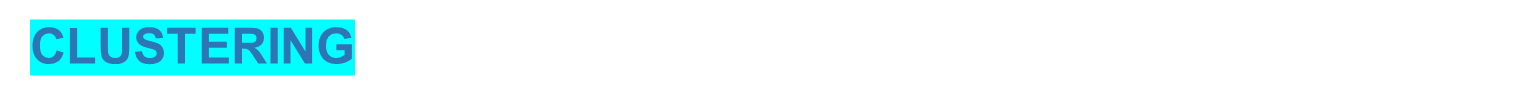

### Make a copy of original data

In [63]:
df_bck = df.copy()
df_bck.head(2)

Class        asin      reviewText     reviewerName  overall  \
0  positive  7414204790  excellent good  Amazon Customer      5.0   
1  positive  7414204790   great product               LH      5.0   

   unixReviewTime reviewTime  verified     summary  \
0    1.457568e+09 2016-03-10      True  Five Stars   
1    1.441066e+09 2015-09-01      True  Five Stars   

                                               title  price  \
0  Lacto Calamine Skin Balance Oil control 120 ml...  12.15   
1  Lacto Calamine Skin Balance Oil control 120 ml...  12.15   

               brand Sentiment  neg    neu    pos  compound  year  month  
0  Pirmal Healthcare  Positive  0.0  0.000  1.000    0.7650  2016      3  
1  Pirmal Healthcare  Positive  0.0  0.196  0.804    0.6249  2015      9

### Select the columns to be used for clustering

In [64]:
X = df_bck[['compound', 'price']]

### Finding the optimal number of clusters using the elbow method

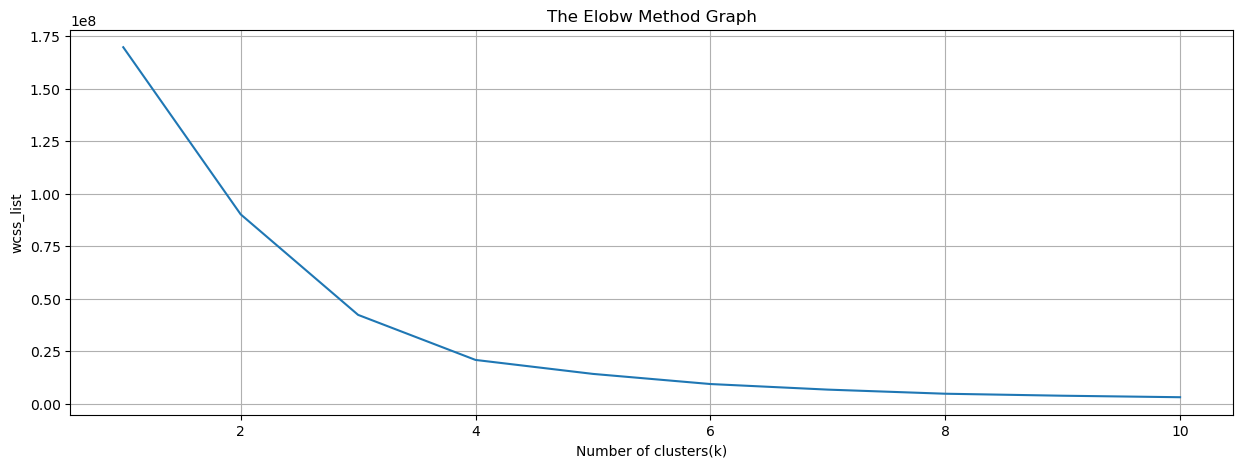

In [65]:
wcss_list= [] 

for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(X)  
    wcss_list.append(kmeans.inertia_) 

plt.figure(figsize = (15, 5)) 
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.grid(True);

### Training the K-means algorithm on the training dataset

In [66]:
X1 = X.values

In [67]:
model1 = KMeans(n_clusters = 3, random_state = 10).fit(X1)
pred = model1.fit_predict(X1)

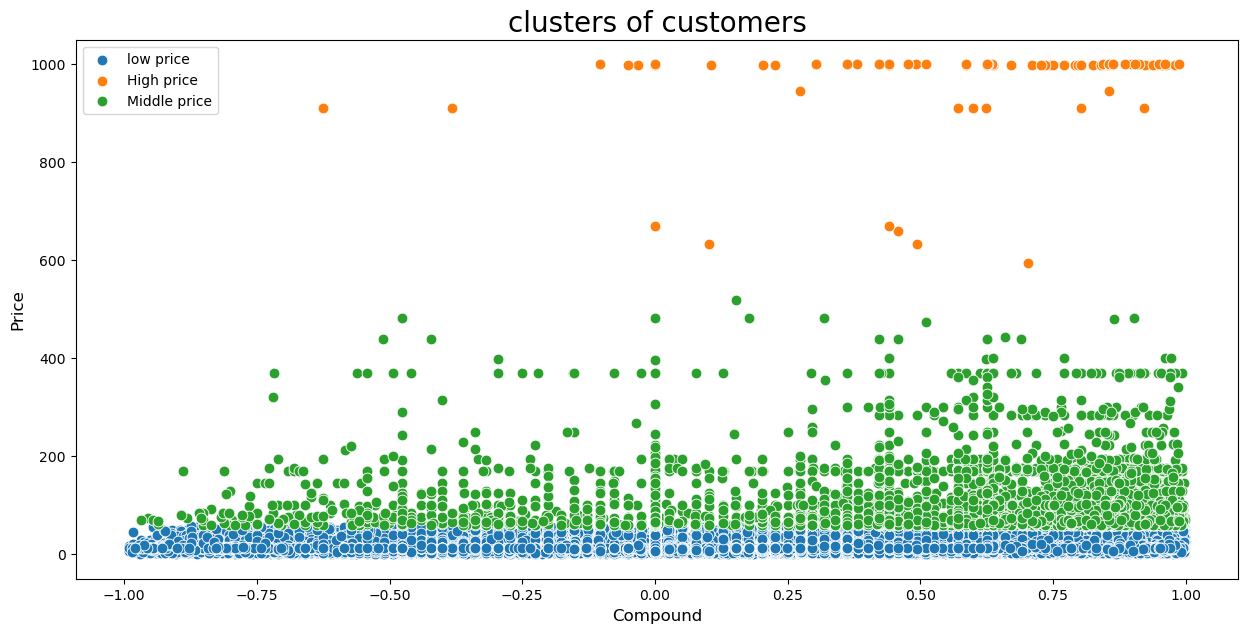

In [68]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=X1[pred==0,0] ,y=X1[pred==0,1] ,s=60,label="low price")
sns.scatterplot(x=X1[pred==1,0] ,y=X1[pred==1,1],s=60,label="High price")
sns.scatterplot(x=X1[pred==2,0] ,y=X1[pred==2,1] ,s=60,label="Middle price")

plt.title("clusters of customers",fontsize=20)
plt.xlabel("Compound",fontsize=12)
plt.ylabel("Price",fontsize=12);

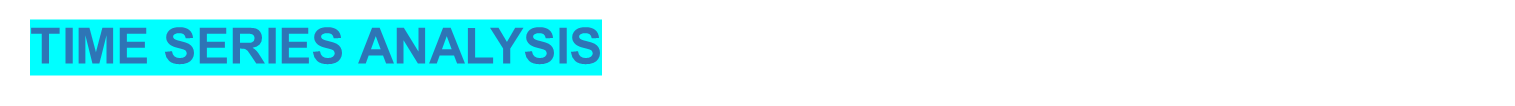

### For brand : Waterpik

In [69]:
wa = df[df['brand'] == 'Waterpik'][['neg', 'pos', 'neu', 'reviewTime']]

In [70]:
wa['reviewTime'] = pd.to_datetime(wa['reviewTime'])

### Set date as index

In [71]:
wa = wa.set_index('reviewTime')
wa.sort_index(True)
wa.head()

neg    pos    neu
reviewTime                     
2006-11-13  0.000  0.244  0.756
2006-11-10  0.000  0.208  0.792
2006-11-09  0.000  1.000  0.000
2006-11-09  0.051  0.275  0.674
2006-11-05  0.181  0.288  0.532

### For brand : Philips Norelco

In [72]:
ph = df[df['brand'] == 'Philips Norelco'][['neg', 'pos', 'neu', 'reviewTime']]

In [73]:
ph['reviewTime'] = pd.to_datetime(ph['reviewTime'])

### Set date as index

In [74]:
ph = ph.set_index('reviewTime')
ph.sort_index(True)
ph.head()

neg    pos    neu
reviewTime                     
2005-10-11  0.321  0.000  0.679
2005-10-03  0.361  0.000  0.639
2005-07-07  0.000  0.401  0.599
2003-05-01  0.000  0.506  0.494
2015-05-11  0.082  0.263  0.655

### Set date as index

In [75]:
df1 = df1.set_index('reviewTime')
df1.sort_index(True)
df1.head()

overall  verified      reviewerID        asin       reviewerName  \
reviewTime                                                                      
02 19, 2015      1.0      True  A1V6B6TNIC10QE  0143026860  theodore j bigham   
12 18, 2014      4.0      True  A2F5GHSXFQ0W6J  0143026860       Mary K. Byke   
08 10, 2014      4.0      True  A1572GUYS7DGSR  0143026860            David G   
03 11, 2013      5.0      True   A1PSGLFK1NSVO  0143026860               TamB   
12 25, 2011      5.0      True   A6IKXKZMTKGSC  0143026860         shoecanary   

                                                    reviewText  \
reviewTime                                                       
02 19, 2015                                              great   
12 18, 2014  My  husband wanted to reading about the Negro ...   
08 10, 2014  This book was very informative, covering all a...   
03 11, 2013  I am already a baseball fan and knew a bit abo...   
12 25, 2011  This was a good story of the Black leagues. I ...   

                                                       summary  \
reviewTime                                                       
02 19, 2015                                           One Star   
12 18, 2014  ... to reading about the Negro Baseball and th...   
08 10, 2014                                     Worth the Read   
03 11, 2013                                          Good Read   
12 25, 2011                More than facts, a good story read!   

             unixReviewTime vote style image  
reviewTime                                    
02 19, 2015      1424304000  NaN   NaN   NaN  
12 18, 2014      1418860800  NaN   NaN   NaN  
08 10, 2014      1407628800  NaN   NaN   NaN  
03 11, 2013      1362960000  NaN   NaN   NaN  
12 25, 2011      1324771200    5   NaN   NaN

### Resampling the data based on month wise

In [76]:
wa = wa.resample('M').sum()
wa.shape

(148, 3)

In [77]:
ph = ph.resample('M').sum()
ph.shape

(189, 3)

## For brand : Waterpik

### Seasonal Decompose  For Waterpik on Positive Reviews

In [78]:
decomposition=seasonal_decompose(wa['pos'], period=12)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

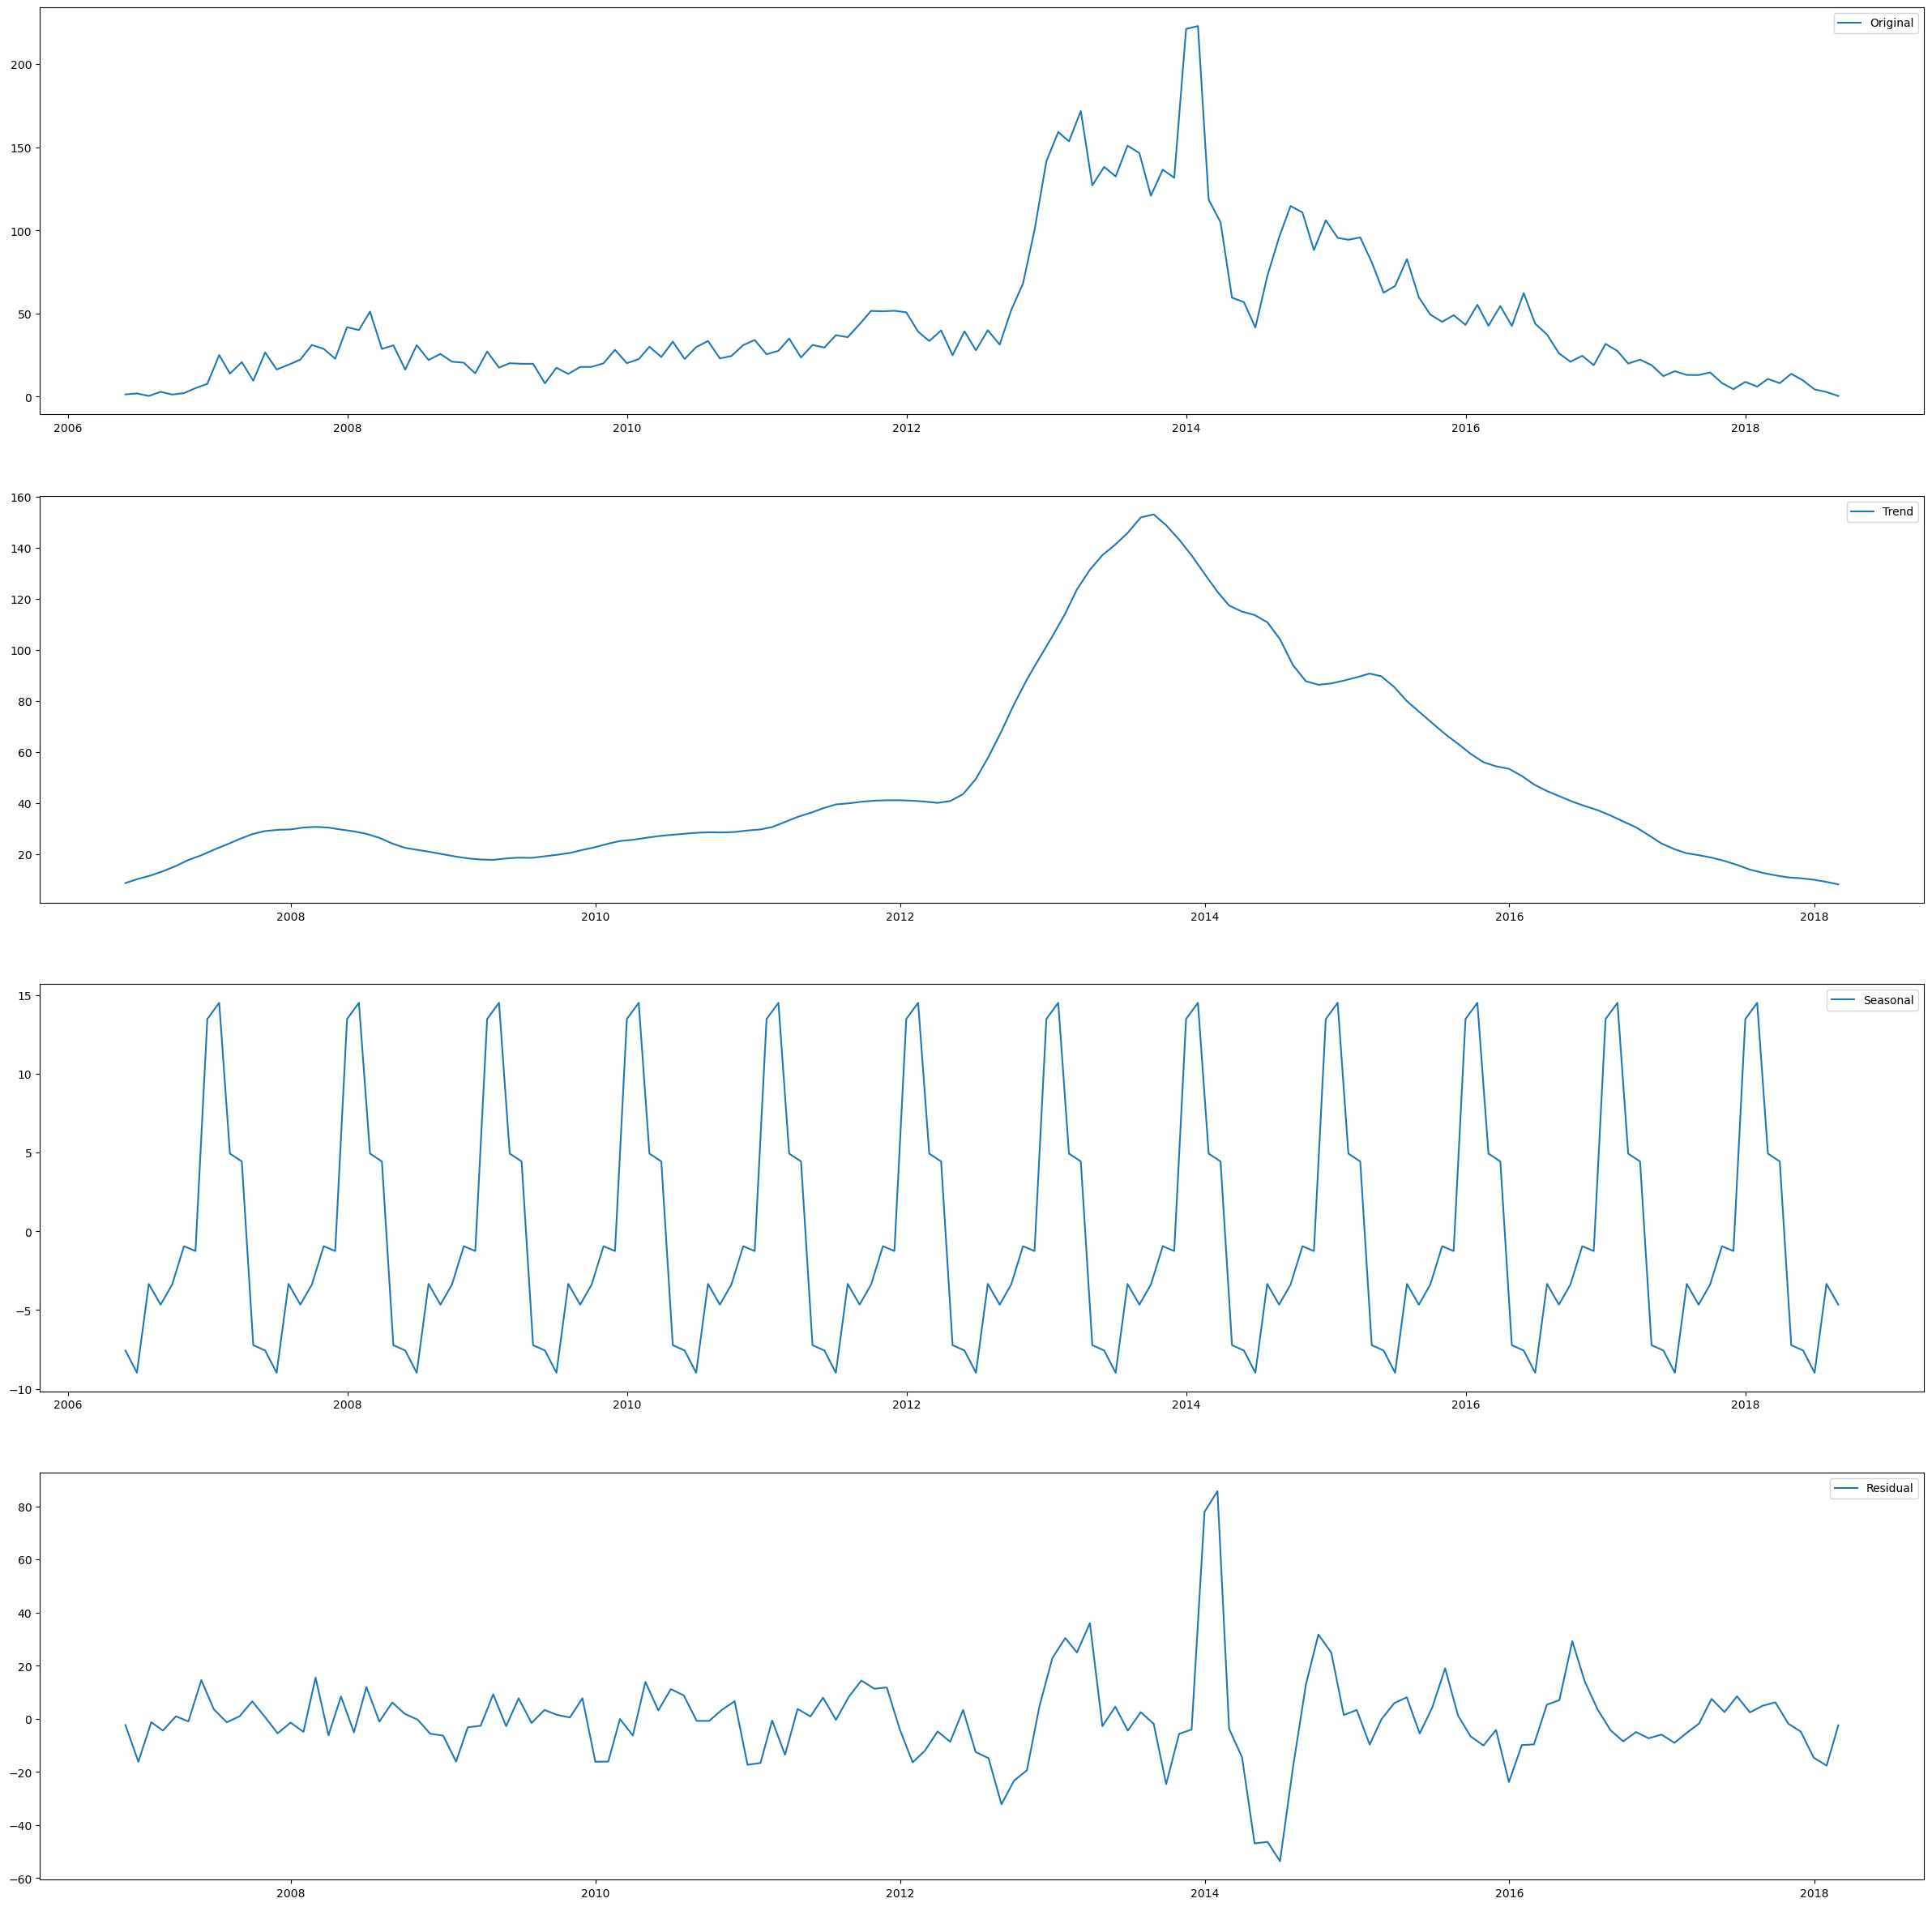

In [79]:
fig,ax = plt.subplots(4,2,figsize=(30,30))

plt.subplot(411)
plt.plot(wa['pos'],label='Original')
plt.legend()

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend();

### Seasonal Decompose  For Waterpik on Neutral Reviews

In [80]:
decomposition=seasonal_decompose(wa['neu'], period=12)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

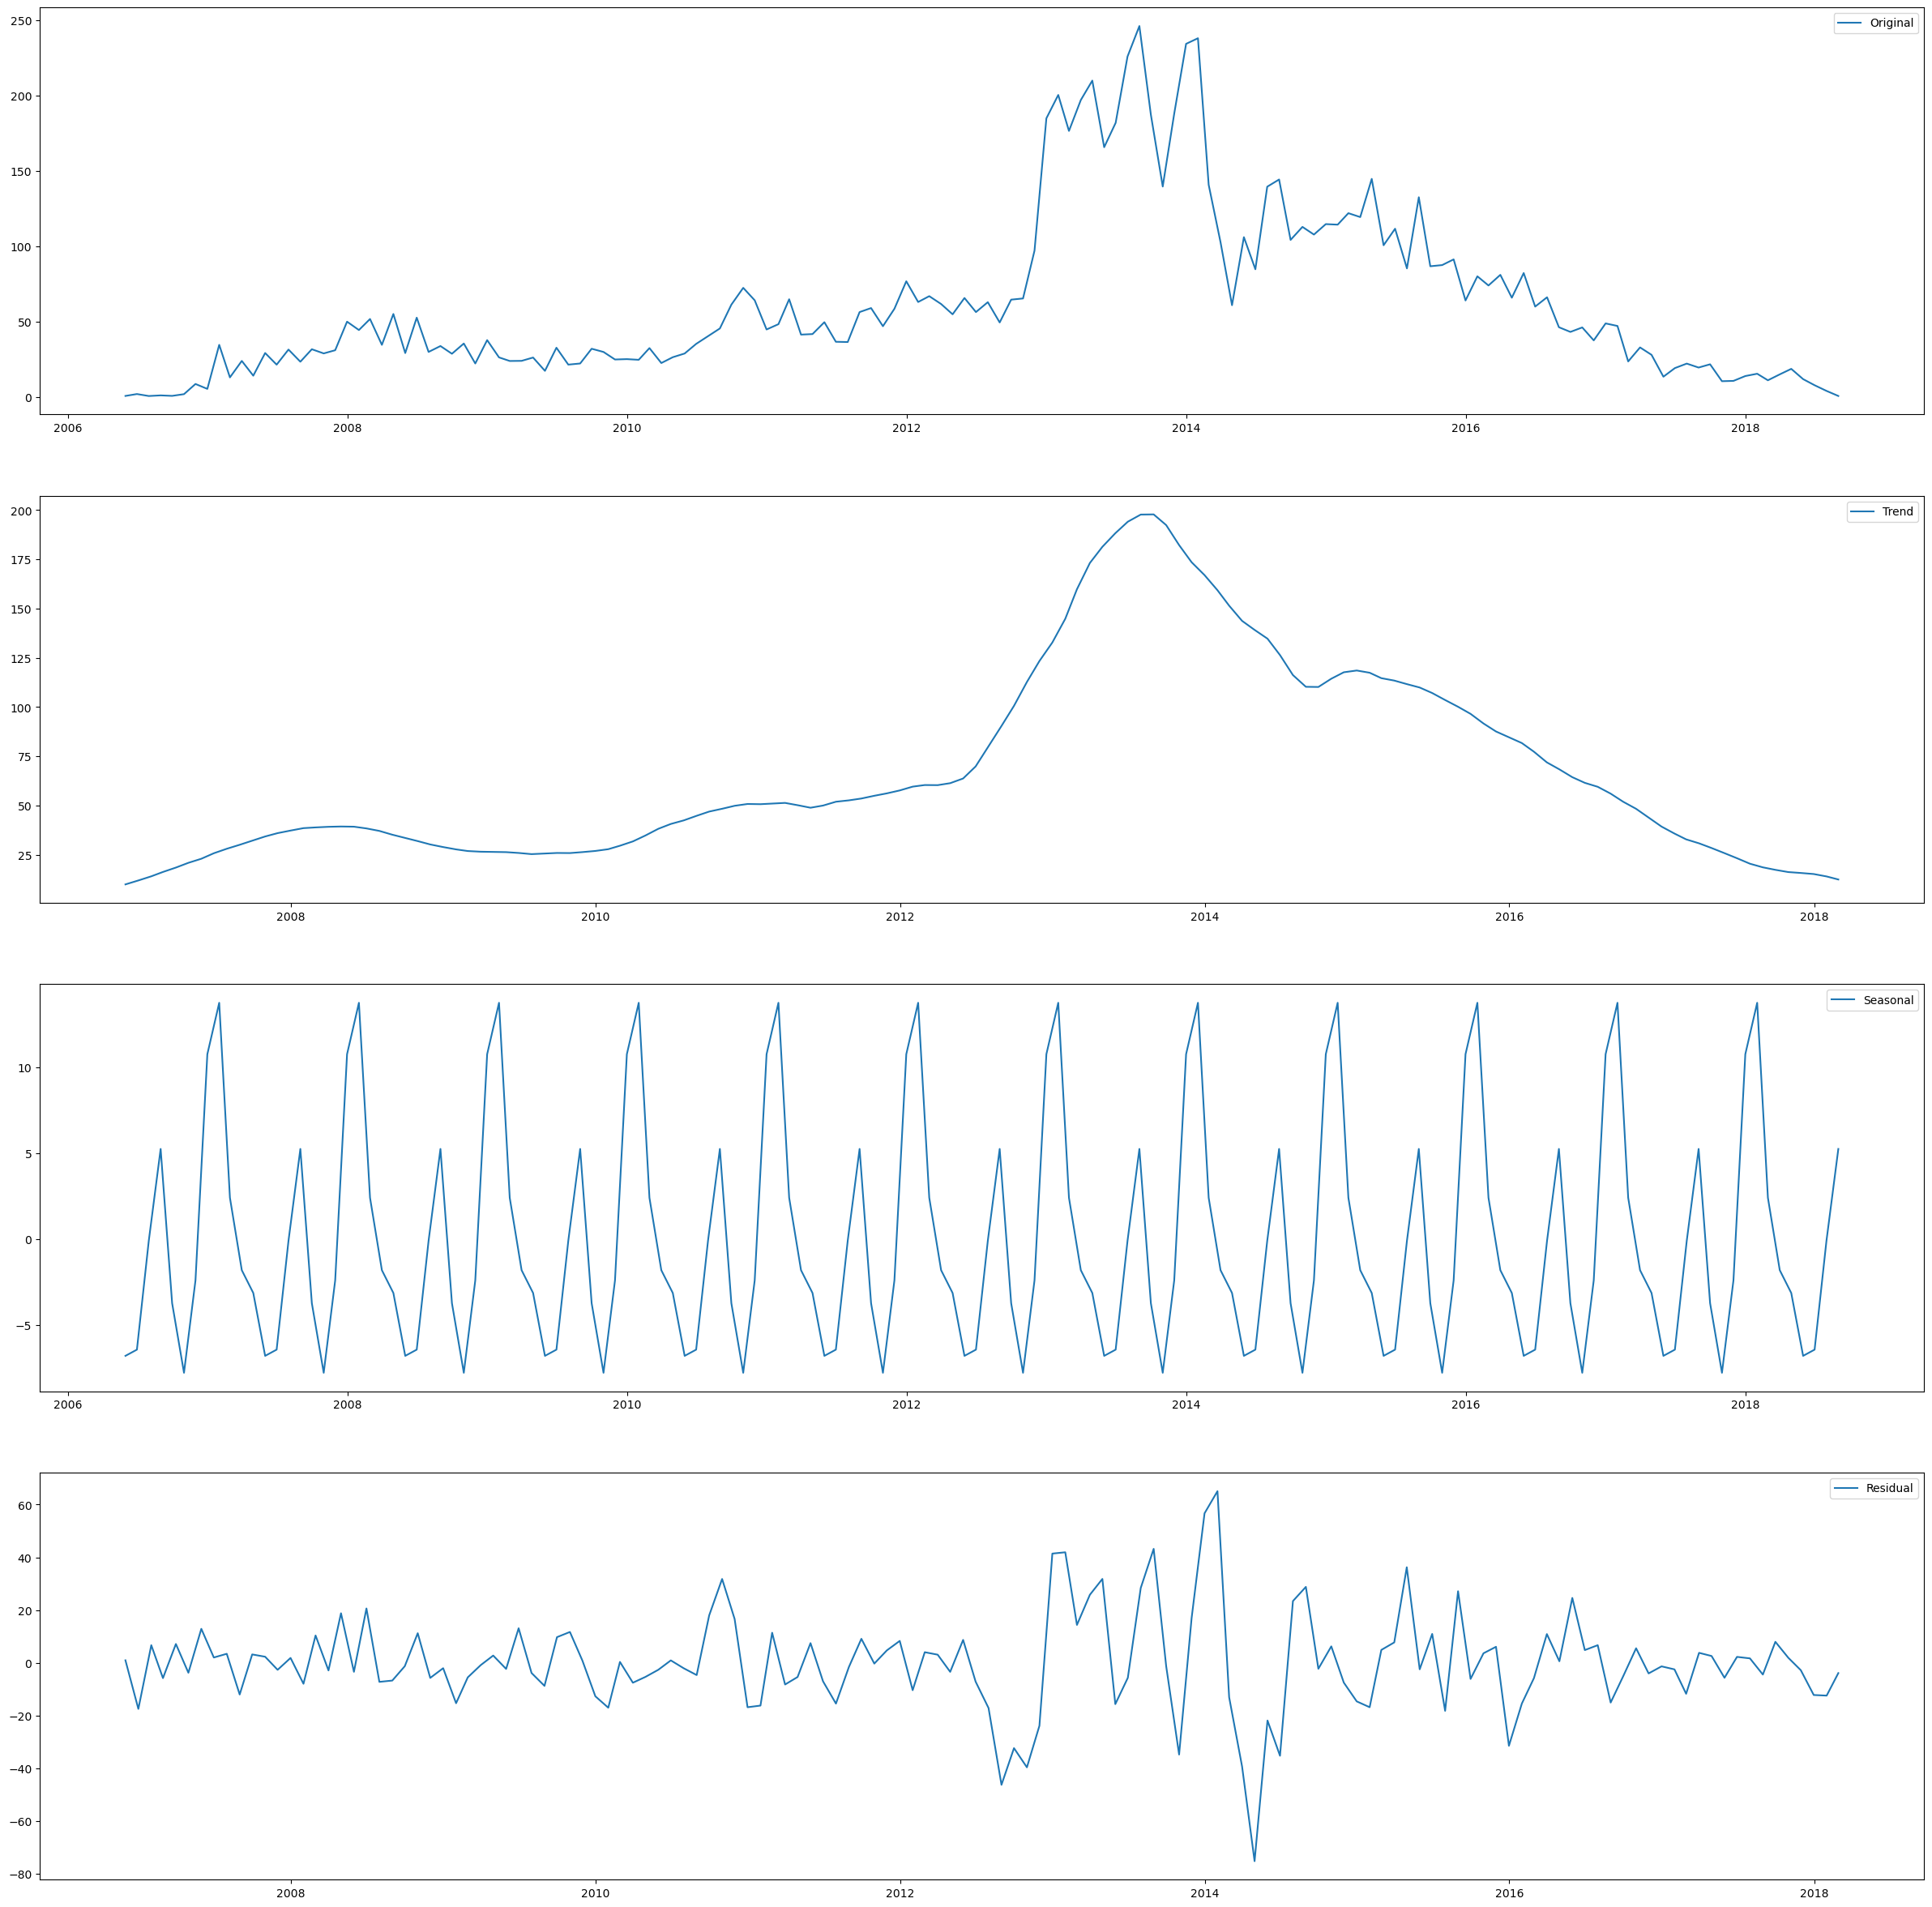

In [81]:
fig,ax = plt.subplots(4,2,figsize=(30,30))

plt.subplot(411)
plt.plot(wa['neu'],label='Original')
plt.legend()

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend();

### Seasonal Decompose  For Waterpik on Negative Reviews

In [82]:
decomposition=seasonal_decompose(wa['neg'], period=12)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

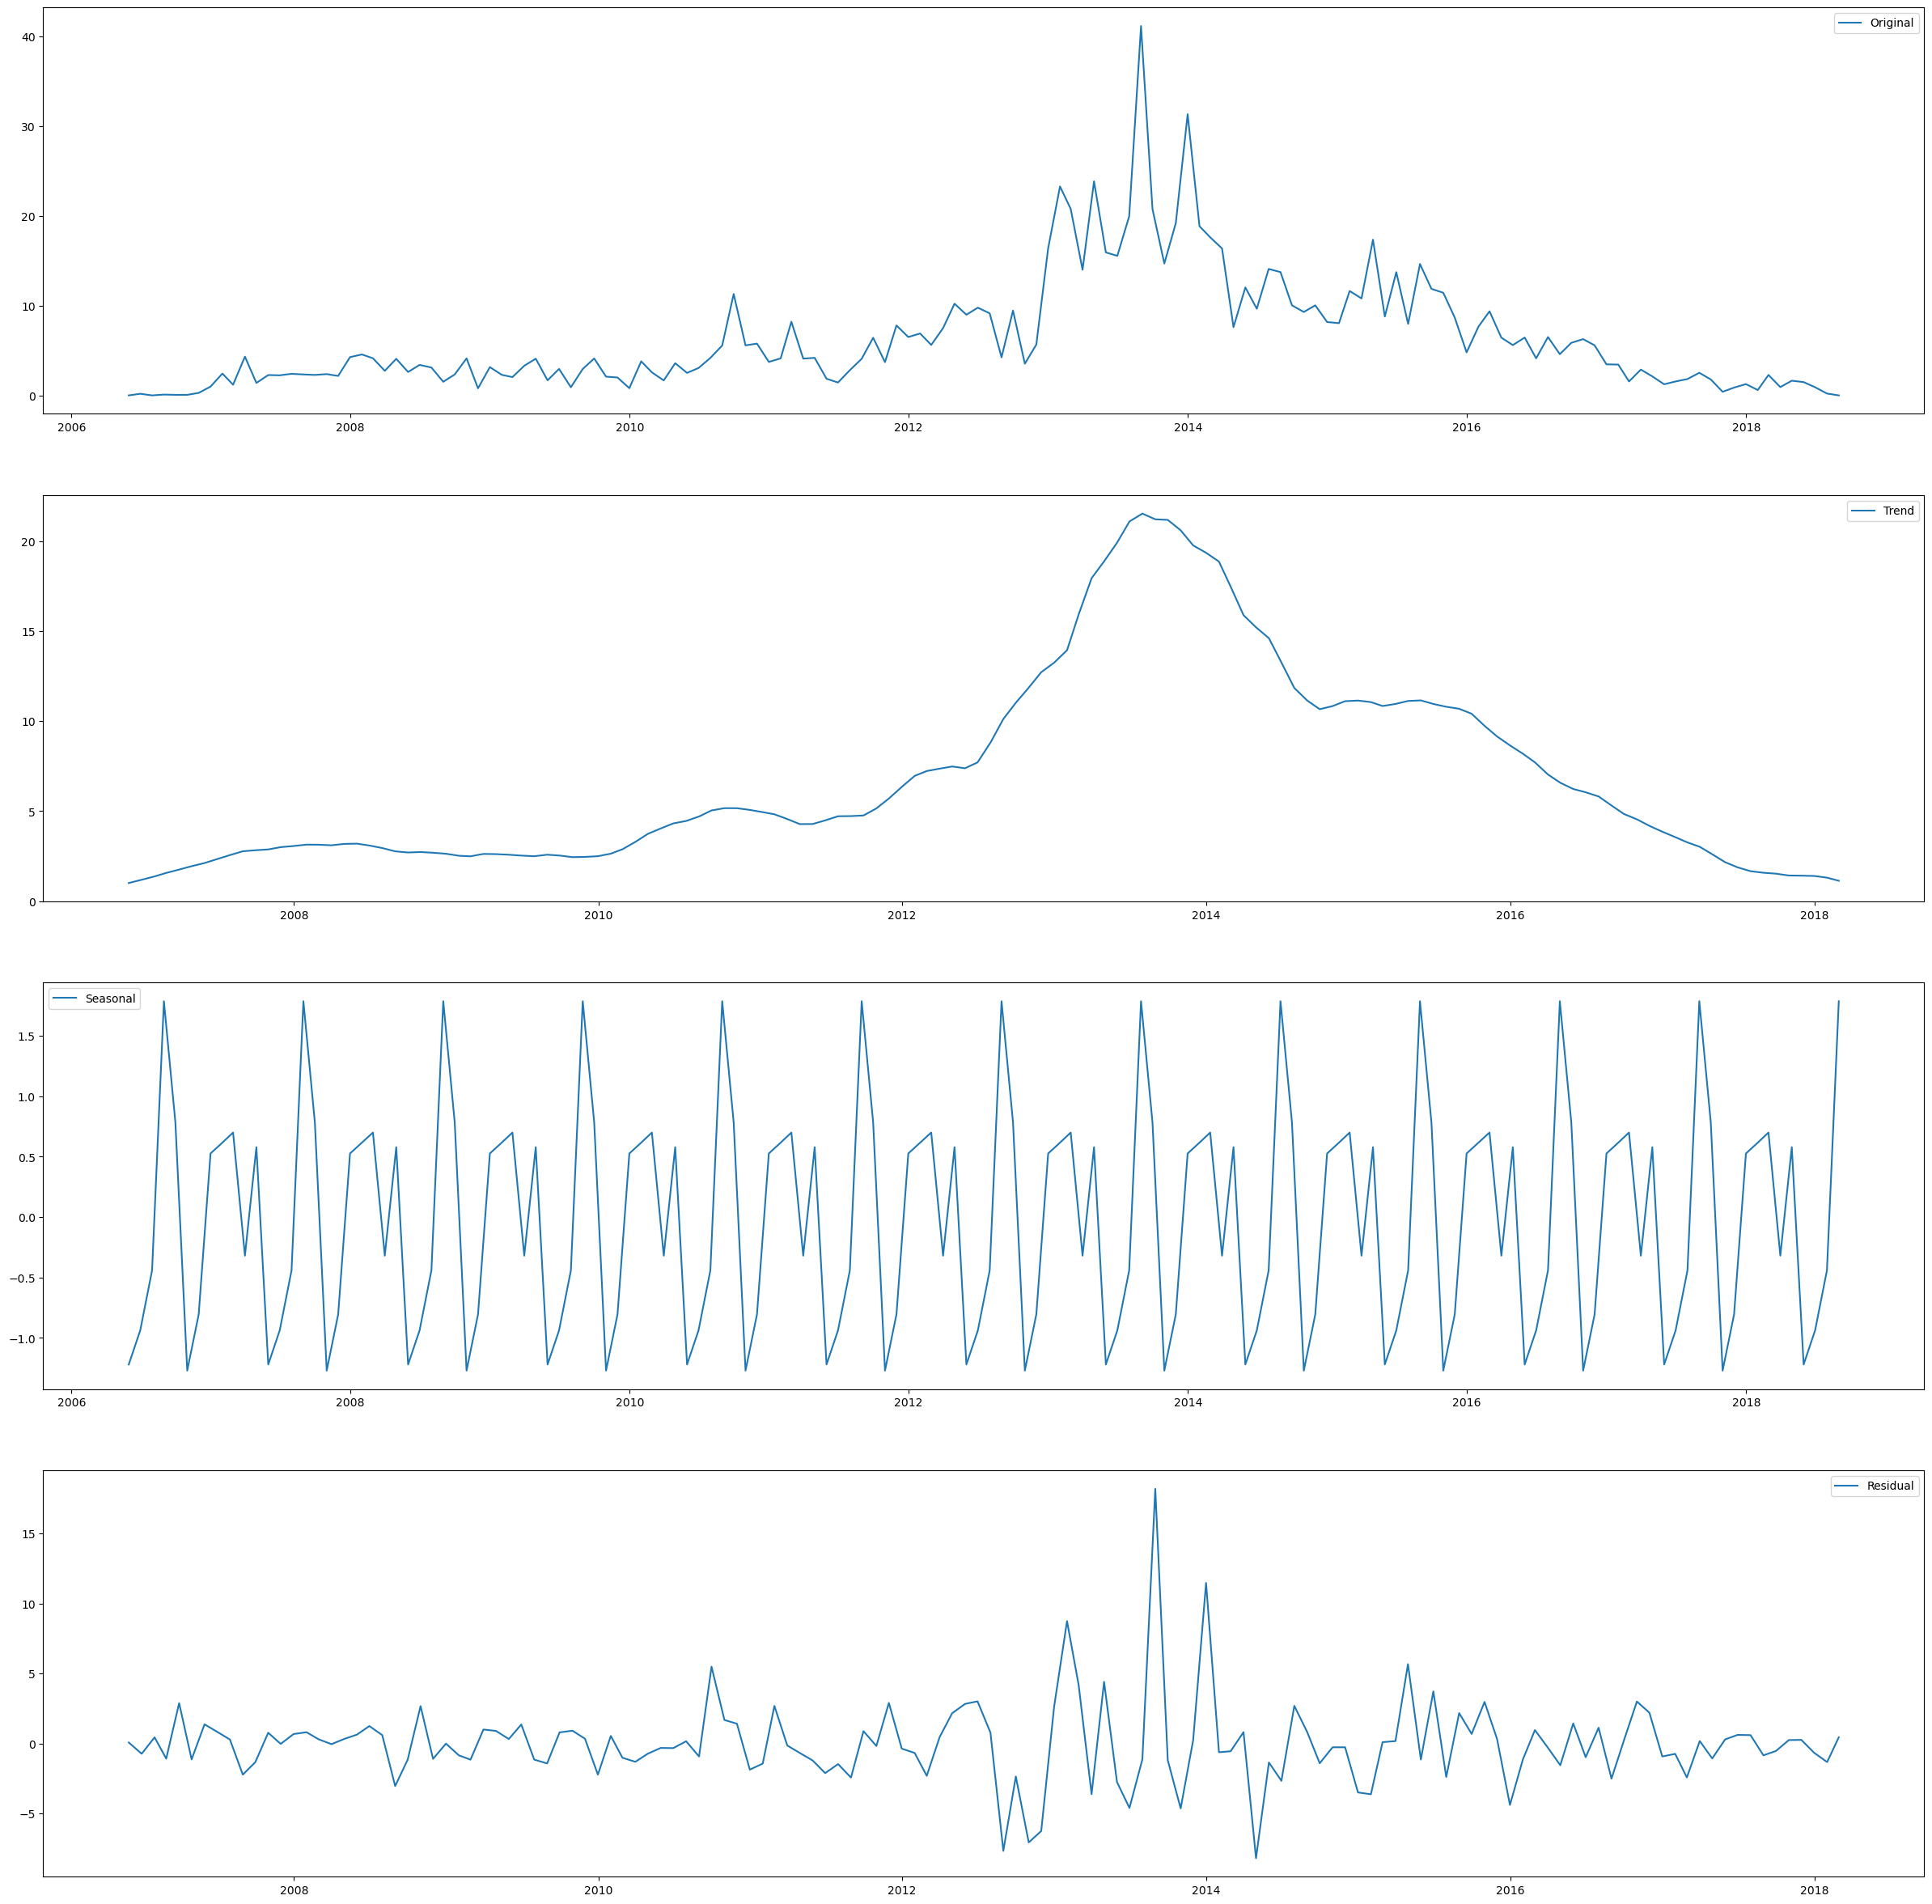

In [83]:
fig,ax = plt.subplots(4,2,figsize=(30,30))

plt.subplot(411)
plt.plot(wa['neg'],label='Original')
plt.legend()

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend();

### Creating function to check stationarity

In [84]:
def checkstationary(df):
    pvalue = adfuller(df)[1]
    if pvalue < 0.05:
        ret = 'Pvalue:{}. Data is stationary, Proceed to model building'.format(pvalue)
    else:
        ret = 'Pvalue:{}.Data is not stationary, make data stationary'.format(pvalue)
    return ret

In [85]:
# Checking Stationarity of positive Sentiment Column
checkstationary(wa['pos'])

'Pvalue:0.16875252254804285.Data is not stationary, make data stationary'

In [86]:
# Checking Stationarity of Neutral Sentiment Column
checkstationary(wa['neu'])

'Pvalue:0.5365297731412361.Data is not stationary, make data stationary'

In [87]:
# Checking Stationarity of Negative Sentiment Column
checkstationary(wa['neg'])

'Pvalue:0.3562412383881267.Data is not stationary, make data stationary'

### Calculate rolling mean and subtract it from the data

In [88]:
rolling_mean = wa['pos'].rolling(window=3).mean()
df_trend = wa['pos'] - rolling_mean
df_trend.dropna(inplace=True)

# Calculate seasonal component and subtract it from the data
df_seasonal = wa['pos'] - df_trend
df_seasonal.dropna(inplace=True)

# First order differencing
df_diff = df_seasonal.diff().dropna()

In [89]:
rolling_mean1 = wa['neu'].rolling(window=3).mean()
df_trend1 = wa['neu'] - rolling_mean1
df_trend1.dropna(inplace=True)

# Calculate seasonal component and subtract it from the data
df_seasonal1 = wa['neu'] - df_trend1
df_seasonal1.dropna(inplace=True)

# First order differencing
df_diff1 = df_seasonal1.diff().dropna()

In [90]:
rolling_mean2 = wa['neg'].rolling(window=3).mean()
df_trend2 = wa['neg'] - rolling_mean2
df_trend2.dropna(inplace=True)

# Calculate seasonal component and subtract it from the data
df_seasonal2 = wa['neg'] - df_trend2
df_seasonal2.dropna(inplace=True)

# First order differencing
df_diff2 = df_seasonal2.diff().dropna()

### check stationarity for positive column

In [91]:
checkstationary(df_diff)

'Pvalue:0.016833712199354037. Data is stationary, Proceed to model building'

### check stationarity for neutral column

In [92]:
checkstationary(df_diff1)

'Pvalue:0.02299214838911195. Data is stationary, Proceed to model building'

### check stationarity for negative column

In [93]:
checkstationary(df_diff2)

'Pvalue:0.0026539274454173397. Data is stationary, Proceed to model building'

In [94]:
df_time_wa = pd.concat([df_diff, df_diff1, df_diff2], axis=1, keys=['pos','neu', 'neg'])
df_time_wa.head()

pos       neu       neg
reviewTime                              
2006-08-31  0.514333  0.122000  0.030333
2006-09-30 -0.220000 -0.406667 -0.039667
2006-10-31  0.569333  0.410333  0.020333
2006-11-30  0.745000  2.526667  0.062000
2006-12-31  2.146667  1.545667  0.307000

###  ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) For positive

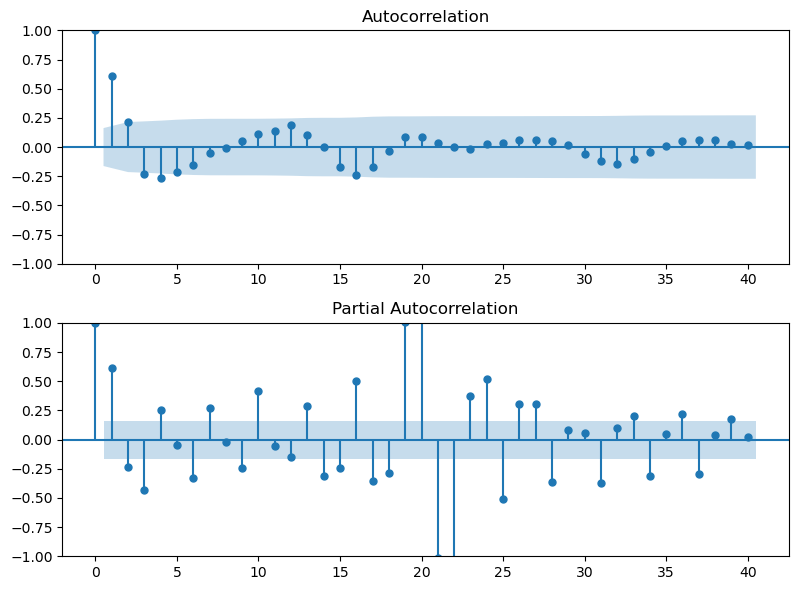

In [95]:
from statsmodels.tsa.stattools import adfuller,acf,pacf
import statsmodels.api as sm

fig = plt.figure(figsize=(8, 6))

# Show ACF
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(df_time_wa['pos'], lags=40, ax=ax1)

# Show PACF
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(df_time_wa['pos'], lags=40, ax=ax2)

plt.tight_layout()

###  ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) For neutral

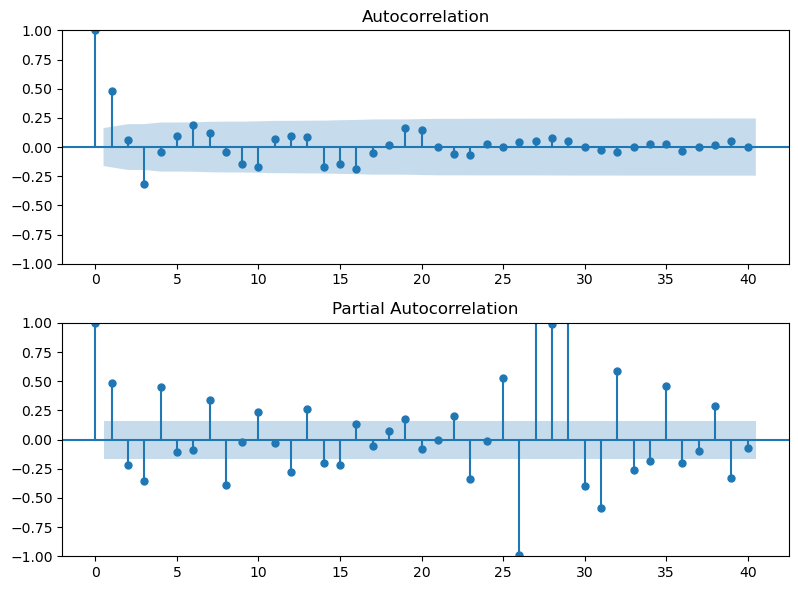

In [96]:
fig = plt.figure(figsize=(8, 6))

# Show ACF
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(df_time_wa['neu'], lags=40, ax=ax1)

# Show PACF
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(df_time_wa['neu'], lags=40, ax=ax2)

plt.tight_layout()

###  ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) For negative

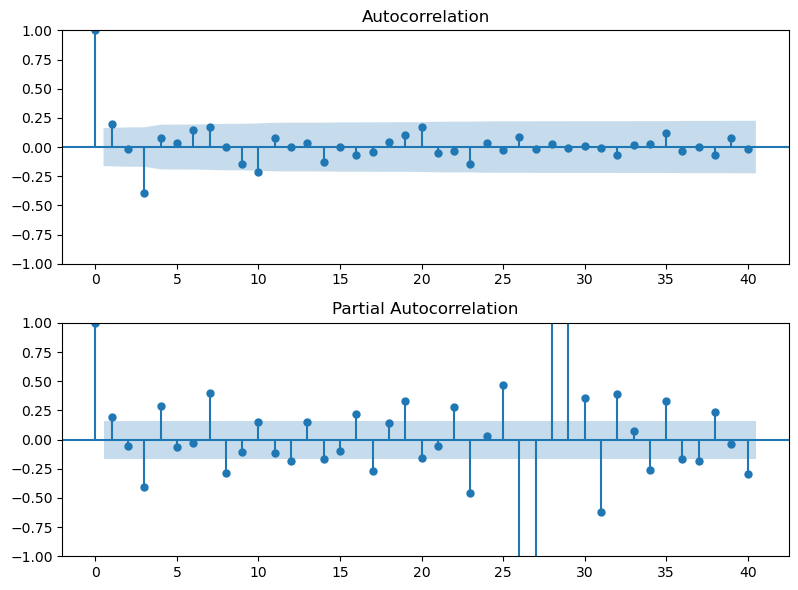

In [97]:
fig = plt.figure(figsize=(8, 6))

# Show ACF
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(df_time_wa['neg'], lags=40, ax=ax1)

# Show PACF
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(df_time_wa['neg'], lags=40, ax=ax2)

plt.tight_layout()

In [98]:
#!pip install pmdarima

### Creating function to get optimum p and q value

### For positive column

In [99]:
import pmdarima as pm

# fit ARIMA model using auto_arima
model = pm.auto_arima(df_time_wa['pos'], start_p=1, start_q=1, max_p=5, max_q=5,
                      seasonal=False, trace=True, error_action='ignore', 
                      suppress_warnings=True, stepwise=True)

# print summary
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1004.728, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1069.866, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1005.966, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1023.059, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=991.787, Time=0.22 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=999.907, Time=0.10 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=971.148, Time=0.17 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=974.811, Time=0.12 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=970.186, Time=0.15 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=968.281, Time=0.12 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=969.938, Time=0.21 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=969.264, Time=0.29 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=970.281, Time=0.18 sec

Best model:  ARIMA(4,0,0)(0,0,0)[0]          
Total fit time: 2.137 seconds
                               

### For neutral column

In [100]:
# fit ARIMA model using auto_arima
model1 = pm.auto_arima(df_time_wa['neu'], start_p=1, start_q=1, max_p=5, max_q=5,
                      seasonal=False, trace=True, error_action='ignore', 
                      suppress_warnings=True, stepwise=True)

# print summary
print(model1.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1076.602, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1112.232, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1077.028, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1082.856, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1070.500, Time=0.17 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1072.447, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1042.298, Time=0.14 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1056.282, Time=0.11 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=1030.028, Time=0.14 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=1028.795, Time=0.10 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=1029.572, Time=0.18 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=1031.423, Time=0.29 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=1030.795, Time=0.24 sec

Best model:  ARIMA(4,0,0)(0,0,0)[0]          
Total fit time: 1.776 seconds
                      

### For negative column

In [101]:
# fit ARIMA model using auto_arima
model1 = pm.auto_arima(df_time_wa['neg'], start_p=1, start_q=1, max_p=5, max_q=5,
                      seasonal=False, trace=True, error_action='ignore', 
                      suppress_warnings=True, stepwise=True)

# print summary
print(model1.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=550.519, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=552.169, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=548.613, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=548.984, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=550.127, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=548.534, Time=0.16 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=521.809, Time=0.09 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=528.006, Time=0.07 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=520.195, Time=0.13 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=518.495, Time=0.11 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=520.030, Time=0.13 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=522.023, Time=0.17 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=520.495, Time=0.22 sec

Best model:  ARIMA(4,0,0)(0,0,0)[0]          
Total fit time: 1.434 seconds
                               SARI

### Splitting the data

In [102]:
split = int(0.95 * len(df_time_wa))
train = df_time_wa.iloc[:split]
test = df_time_wa.iloc[split:]
print("Train = {}, Test = {}".format(len(train), len(test)))

Train = 137, Test = 8


## Model building

### Creating function for sarima model for positive sentiment

In [103]:
def SARMA1(df):
    model2 = SARIMAX(train['pos'],order=(4, 0, 0),seasonal_order=(4,0,0,12)).fit()
    print('Summary : S')
    print('past_predictions : past')
    print('future_predictions : future')
    select = input('Enter you requried information: ')
    summary  = model2.summary()
    pred1 = model2.predict()
    forecast1 = model2.forecast(len(test['pos'])+20)
    if select == 'S':
        return summary
    elif select == 'past':
        return pred1
    else:
        return forecast1

### Creating function for sarima model for neutral sentiment

In [104]:
def SARMA2(df):
    model2 = SARIMAX(train['neu'],order=(4, 0, 0),seasonal_order=(4,0,0,12)).fit()
    print('Summary : S')
    print('past_predictions : past')
    print('future_predictions : future')
    select = input('Enter you requried information: ')
    summary  = model2.summary()
    pred1 = model2.predict()
    forecast1 = model2.forecast(len(test['neu'])+20)
    if select == 'S':
        return summary
    elif select == 'past':
        return pred1
    else:
        return forecast1

### Creating function for sarima model for negative sentiment

In [105]:
def SARMA3(df):
    model2 = SARIMAX(train['neg'],order=(0, 0, 1),seasonal_order=(0,0,1,12)).fit()
    print('Summary : S')
    print('past_predictions : past')
    print('future_predictions : future')
    select = input('Enter you requried information: ')
    summary  = model2.summary()
    pred1 = model2.predict()
    forecast1 = model2.forecast(len(test['neg'])+20)
    if select == 'S':
        return summary
    elif select == 'past':
        return pred1
    else:
        return forecast1

In [106]:
train1 = SARMA1(train['pos'])

Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: df


In [107]:
train2 = SARMA2(train['neu'])

Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: df


In [108]:
train3 = SARMA3(train['neg'])

Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: df


## Plot graph Actual vs forecast for positive

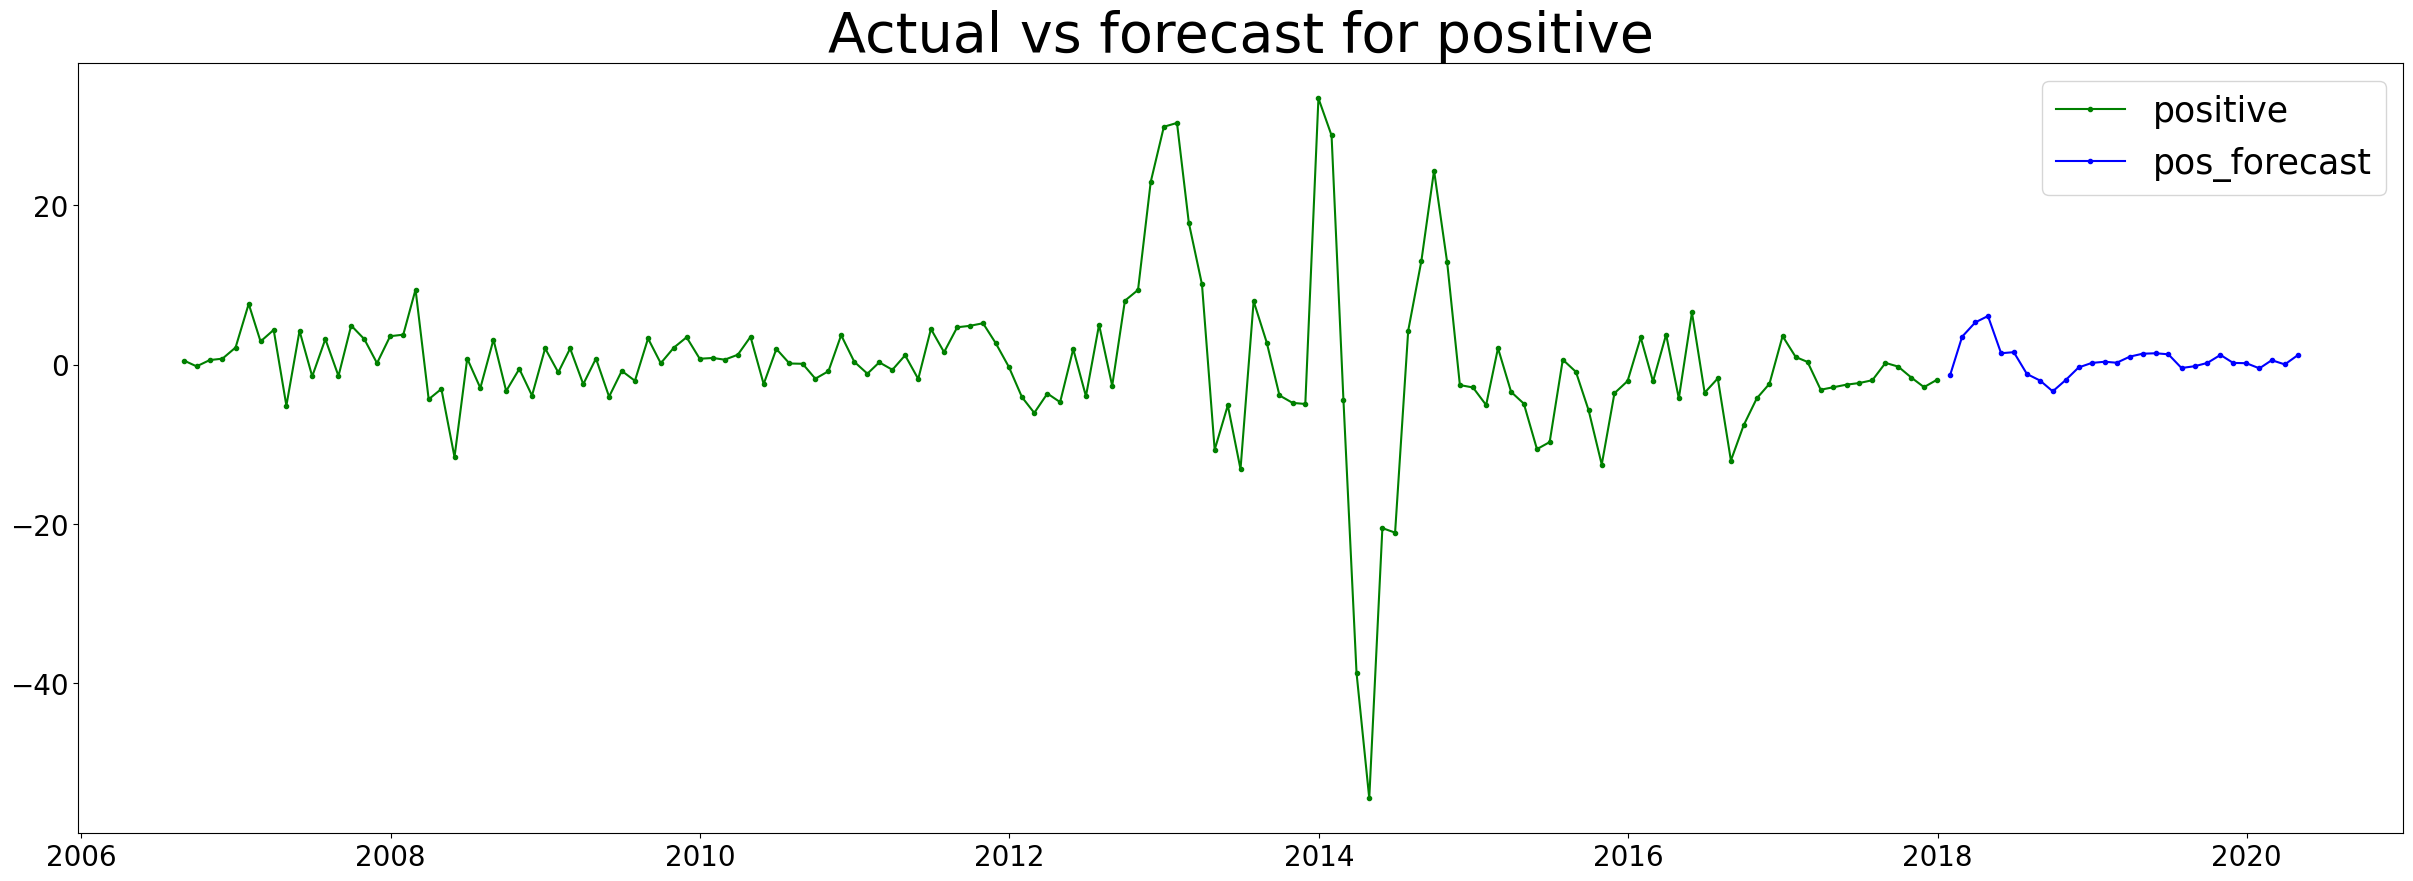

In [109]:
plt.figure(figsize=(30,10))
plt.title('Actual vs forecast for positive',fontsize=40)
plt.plot(train['pos'],marker = '.', label = 'positive', color = 'g')
plt.plot(train1,marker = '.', label = 'pos_forecast', color = 'b')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=25);

## Plot graph Actual vs forecast for neutral

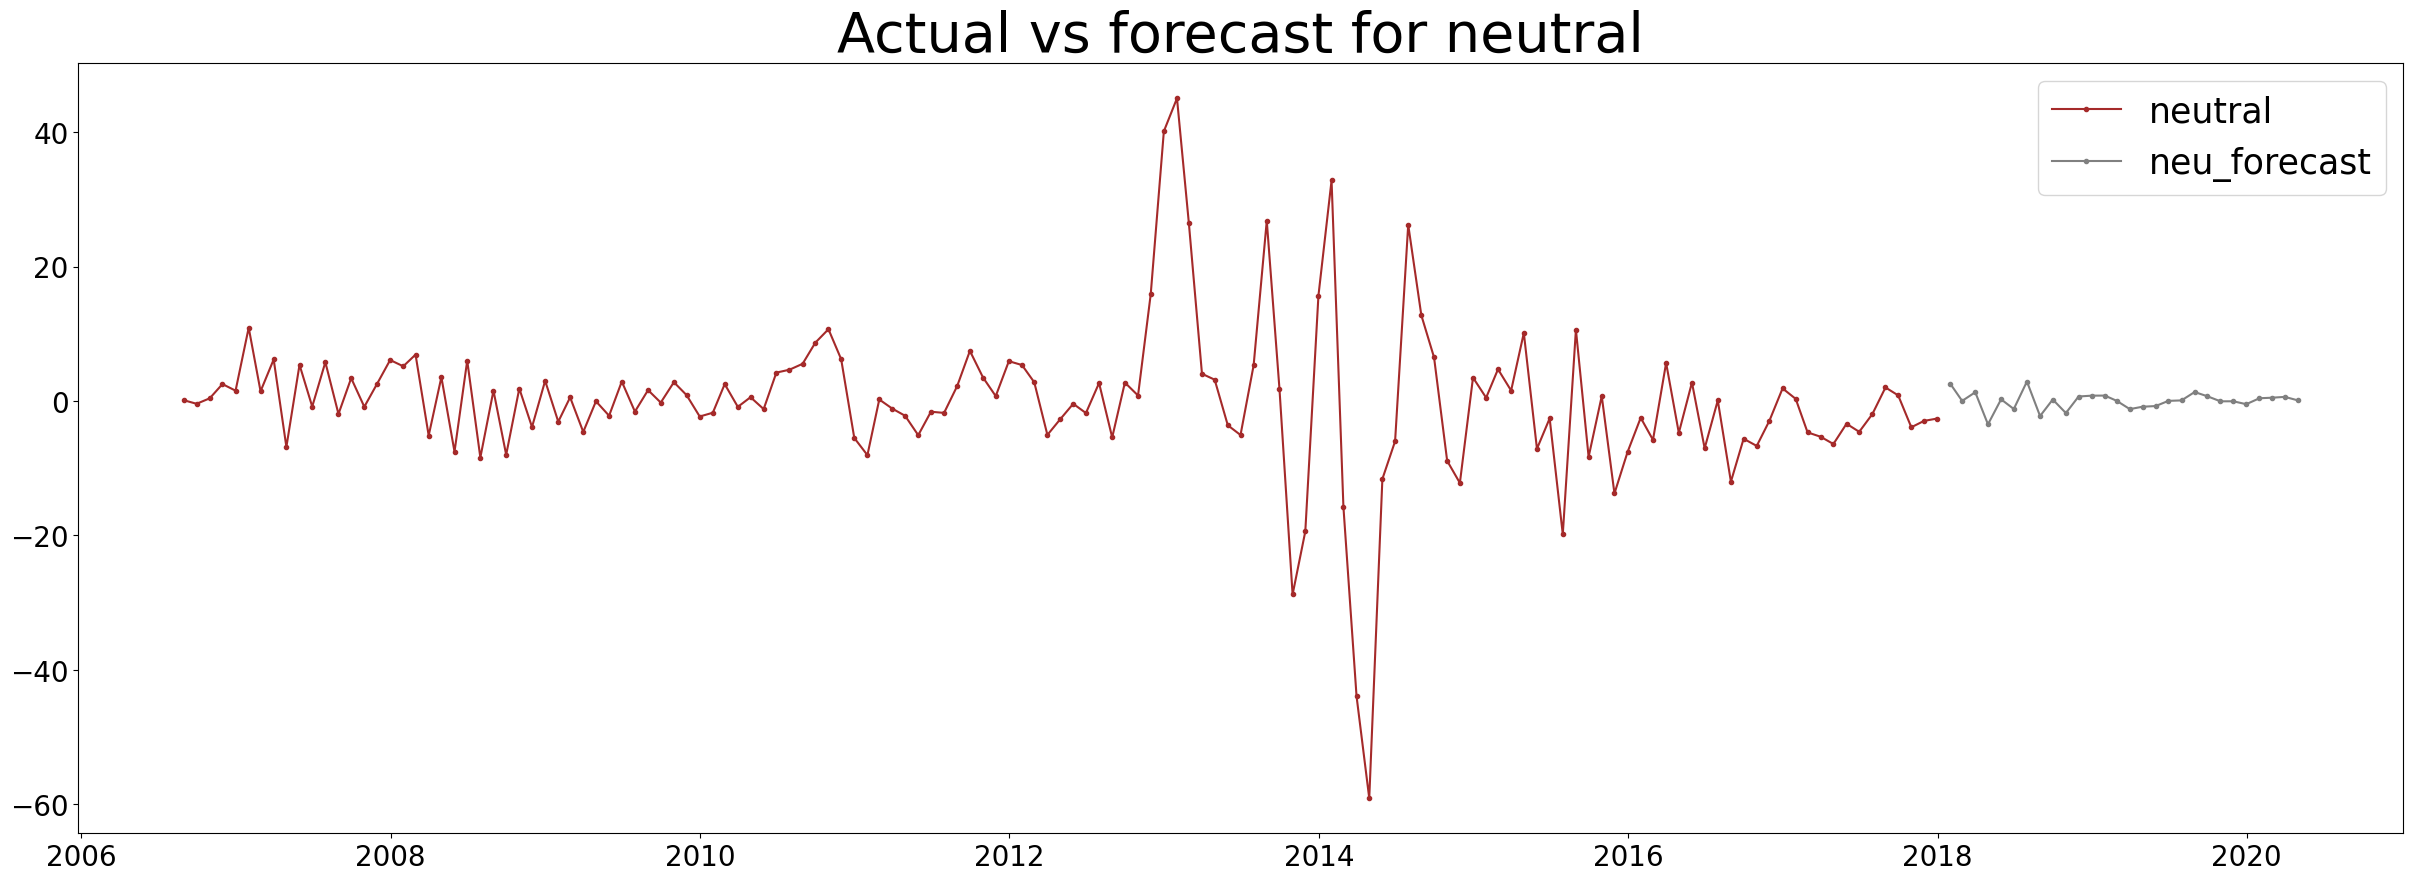

In [110]:
plt.figure(figsize=(30,10))
plt.title('Actual vs forecast for neutral',fontsize=40)
plt.plot(train['neu'],marker = '.', label = 'neutral', color = 'brown')
plt.plot(train2,marker = '.', label = 'neu_forecast', color = 'grey')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=25);

## Plot graph Actual vs forecast for negative

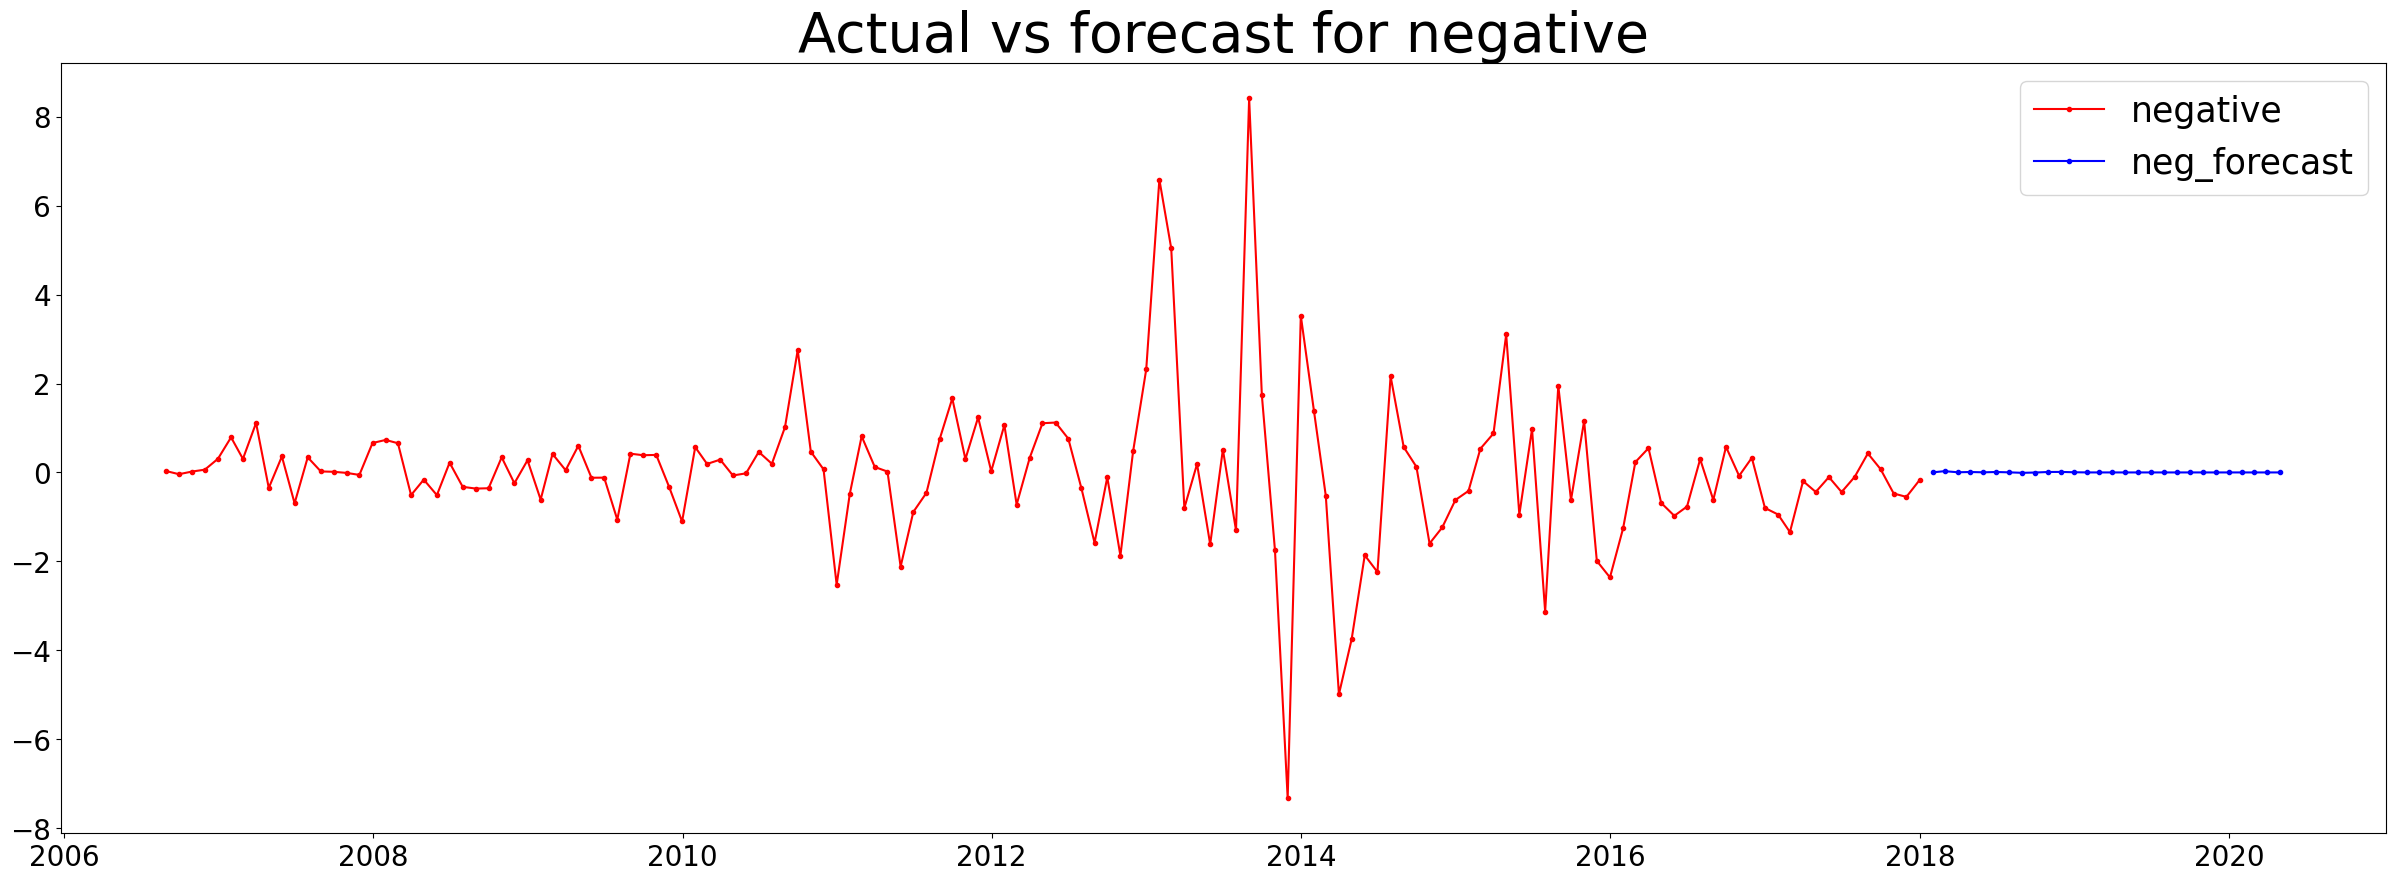

In [111]:
plt.figure(figsize=(30,10))
plt.title('Actual vs forecast for negative',fontsize=40)
plt.plot(train['neg'],marker = '.', label = 'negative', color = 'red')
plt.plot(train3,marker = '.', label = 'neg_forecast', color = 'b')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=25);

### Delivery words on text

In [113]:
def is_delivery_related(review):
    keywords = ['delivery', 'shipping', 'shipment', 'courier', 'logistics', 'dispatch', 'transport', 'package', 'tracking', 'eta']
    for keyword in keywords:
        if keyword in review.lower():
            return 1
    return 0

In [114]:
df['delivery_related'] = df['reviewText'].apply(is_delivery_related)

In [115]:
df.delivery_related.value_counts()

0    314555
1     16067
Name: delivery_related, dtype: int64

In [116]:
new = df[df['delivery_related'] == 1][['reviewText','brand']]
new

reviewText              brand
11      delivery took long time started use work based...  Pirmal Healthcare
14                       great product fast shipment love  Pirmal Healthcare
16      read mary kay satin hands lotion online someon...           Mary Kay
42      package complete satisfaction wife smell great...      Jenna Jameson
51      first smells fruity complexity patchouli fan p...      Jenna Jameson
...                                                   ...                ...
330895  excellant model excellant quality detail one y...            unknown
330909  really people sorry used reviews making decisi...            unknown
330926                      luv fast shipping thanks much            unknown
330933     stuff perfect package good shipping fast thank        Unique Edge
330945  hair quality expect price shiny doll-like hair...               COCO

[16067 rows x 2 columns]

## For brand : Philips Norelco

### Seasonal Decompose  For Philips Norelco on Positive Reviews

In [117]:
decomposition=seasonal_decompose(ph['pos'], period=12)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

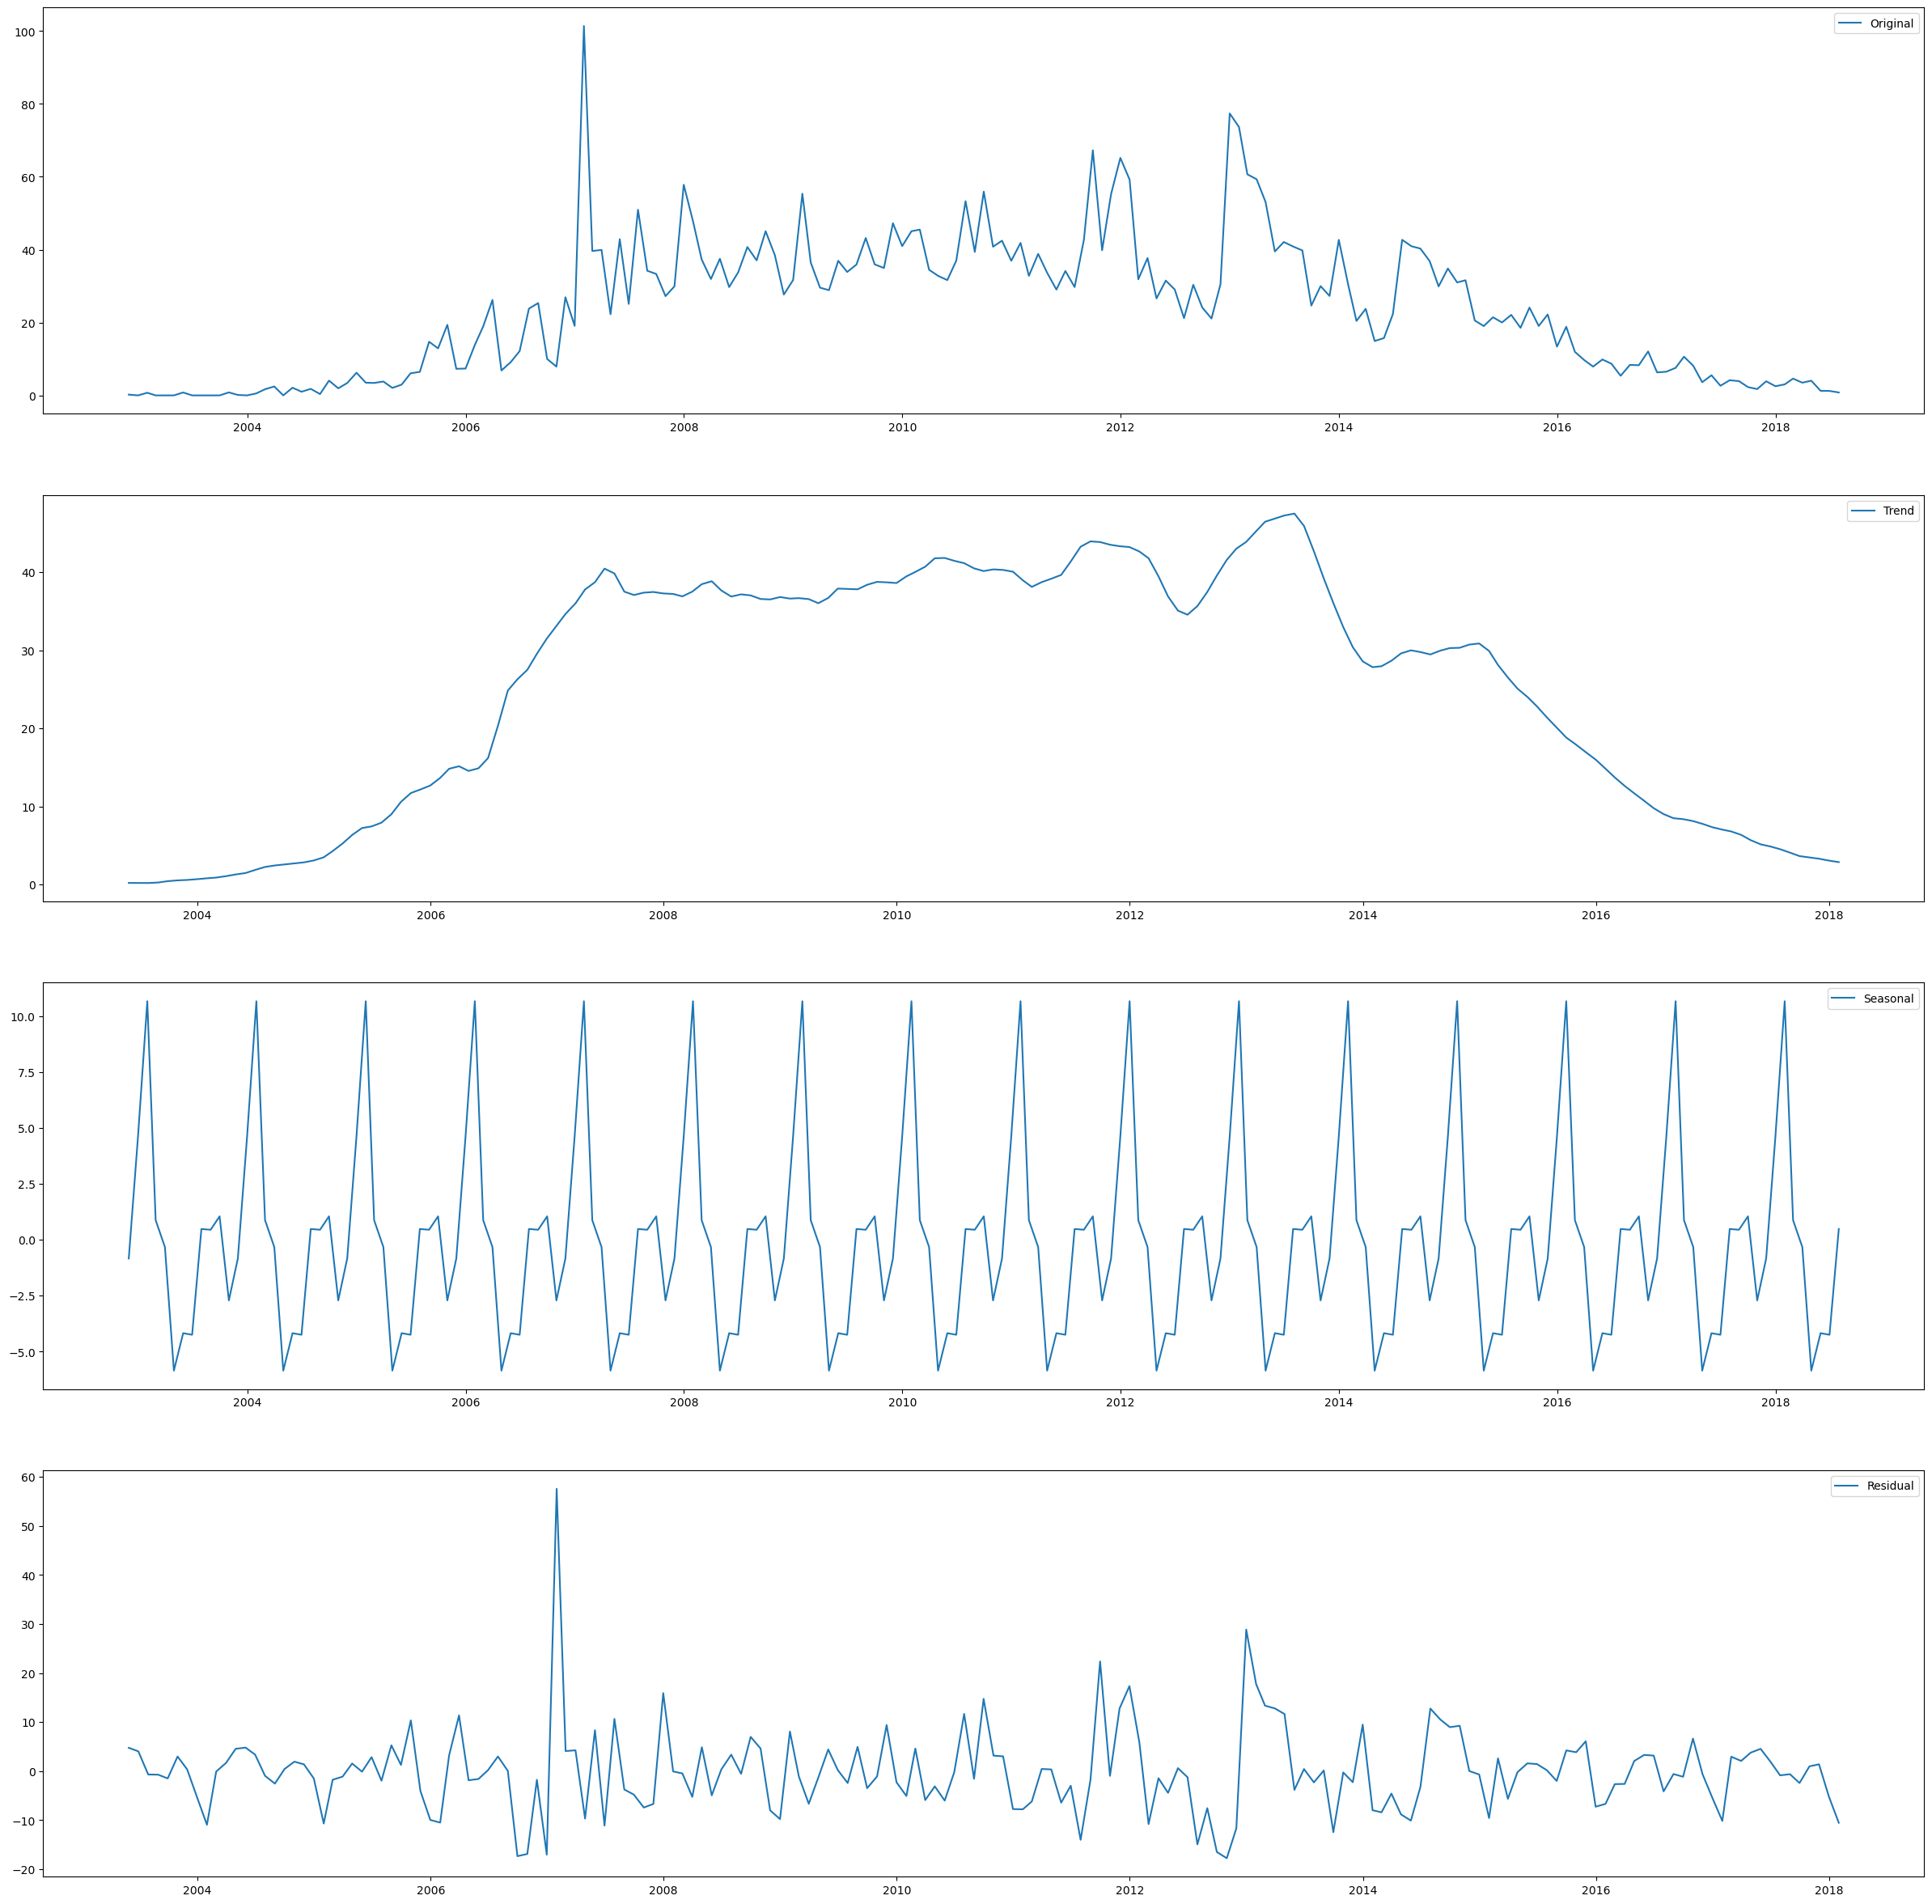

In [118]:
fig,ax = plt.subplots(4,2,figsize=(30,30))

plt.subplot(411)
plt.plot(ph['pos'],label='Original')
plt.legend()

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend();

### Seasonal Decompose  For Philips Norelco on Neutral Reviews

In [119]:
decomposition=seasonal_decompose(ph['neu'], period=12)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

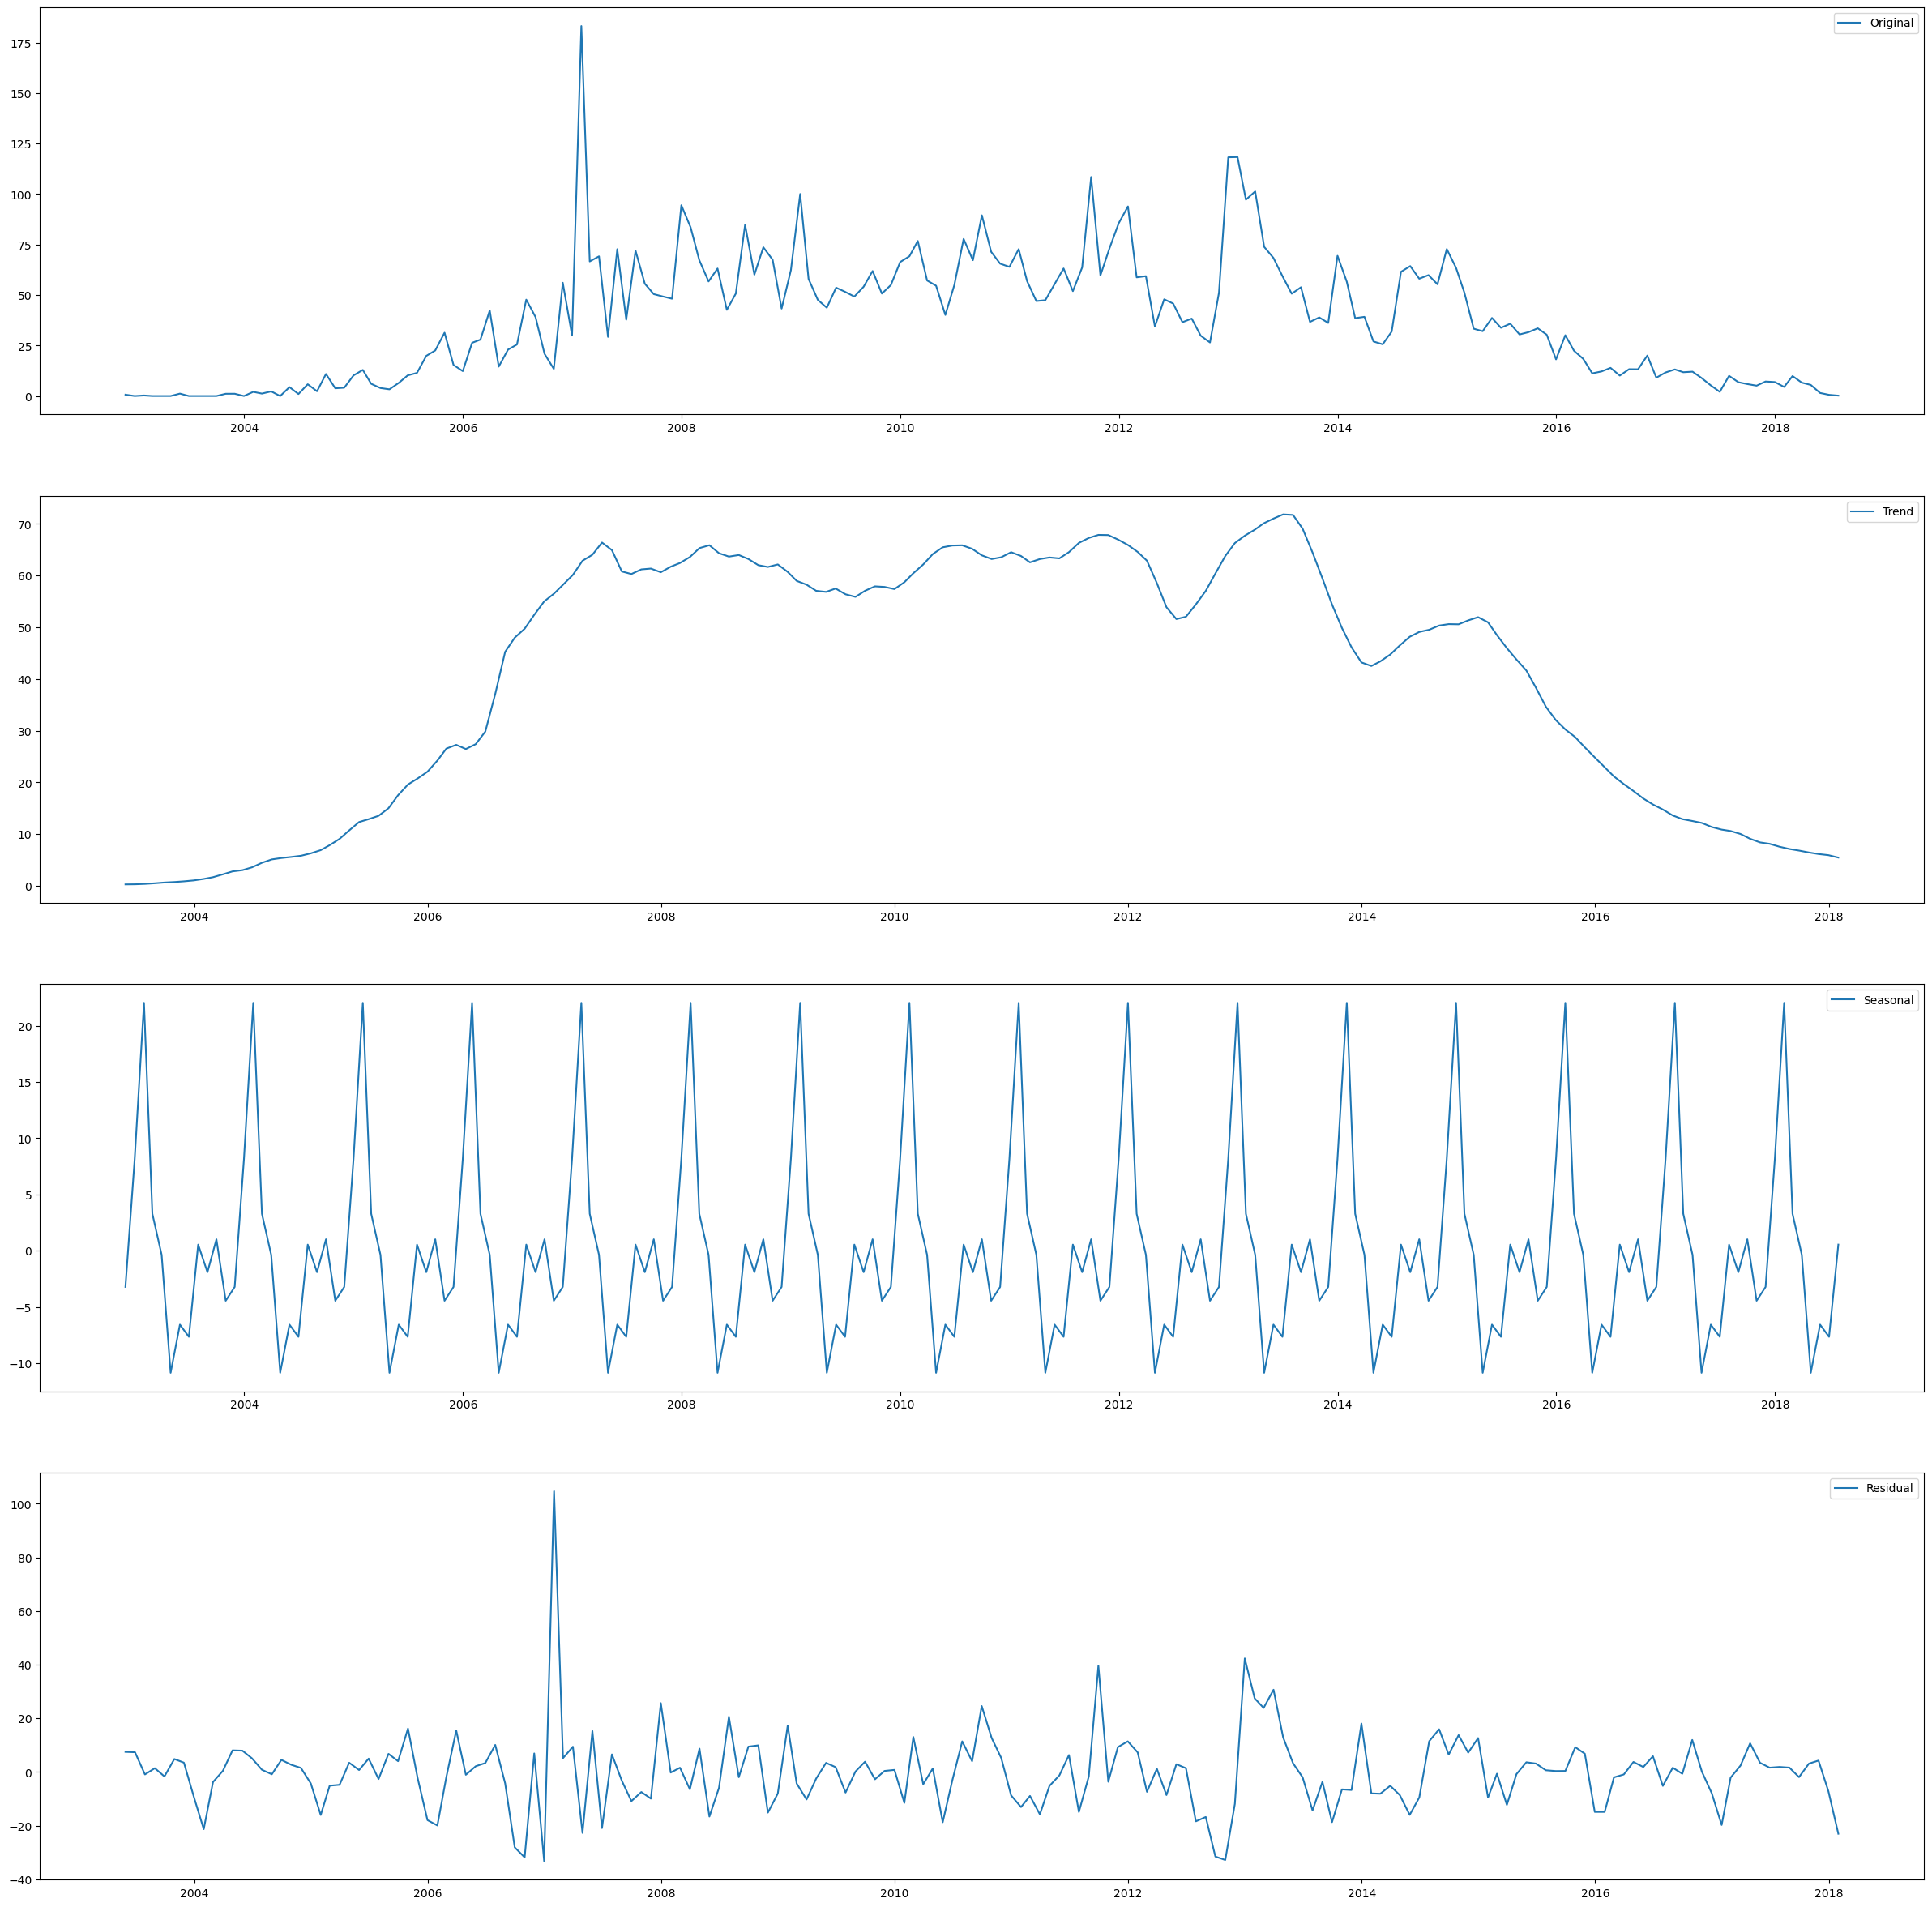

In [120]:
fig,ax = plt.subplots(4,2,figsize=(30,30))

plt.subplot(411)
plt.plot(ph['neu'],label='Original')
plt.legend()

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend();

### Seasonal Decompose  For Philips Norelco on Negative Reviews

In [121]:
decomposition=seasonal_decompose(ph['neg'], period=12)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

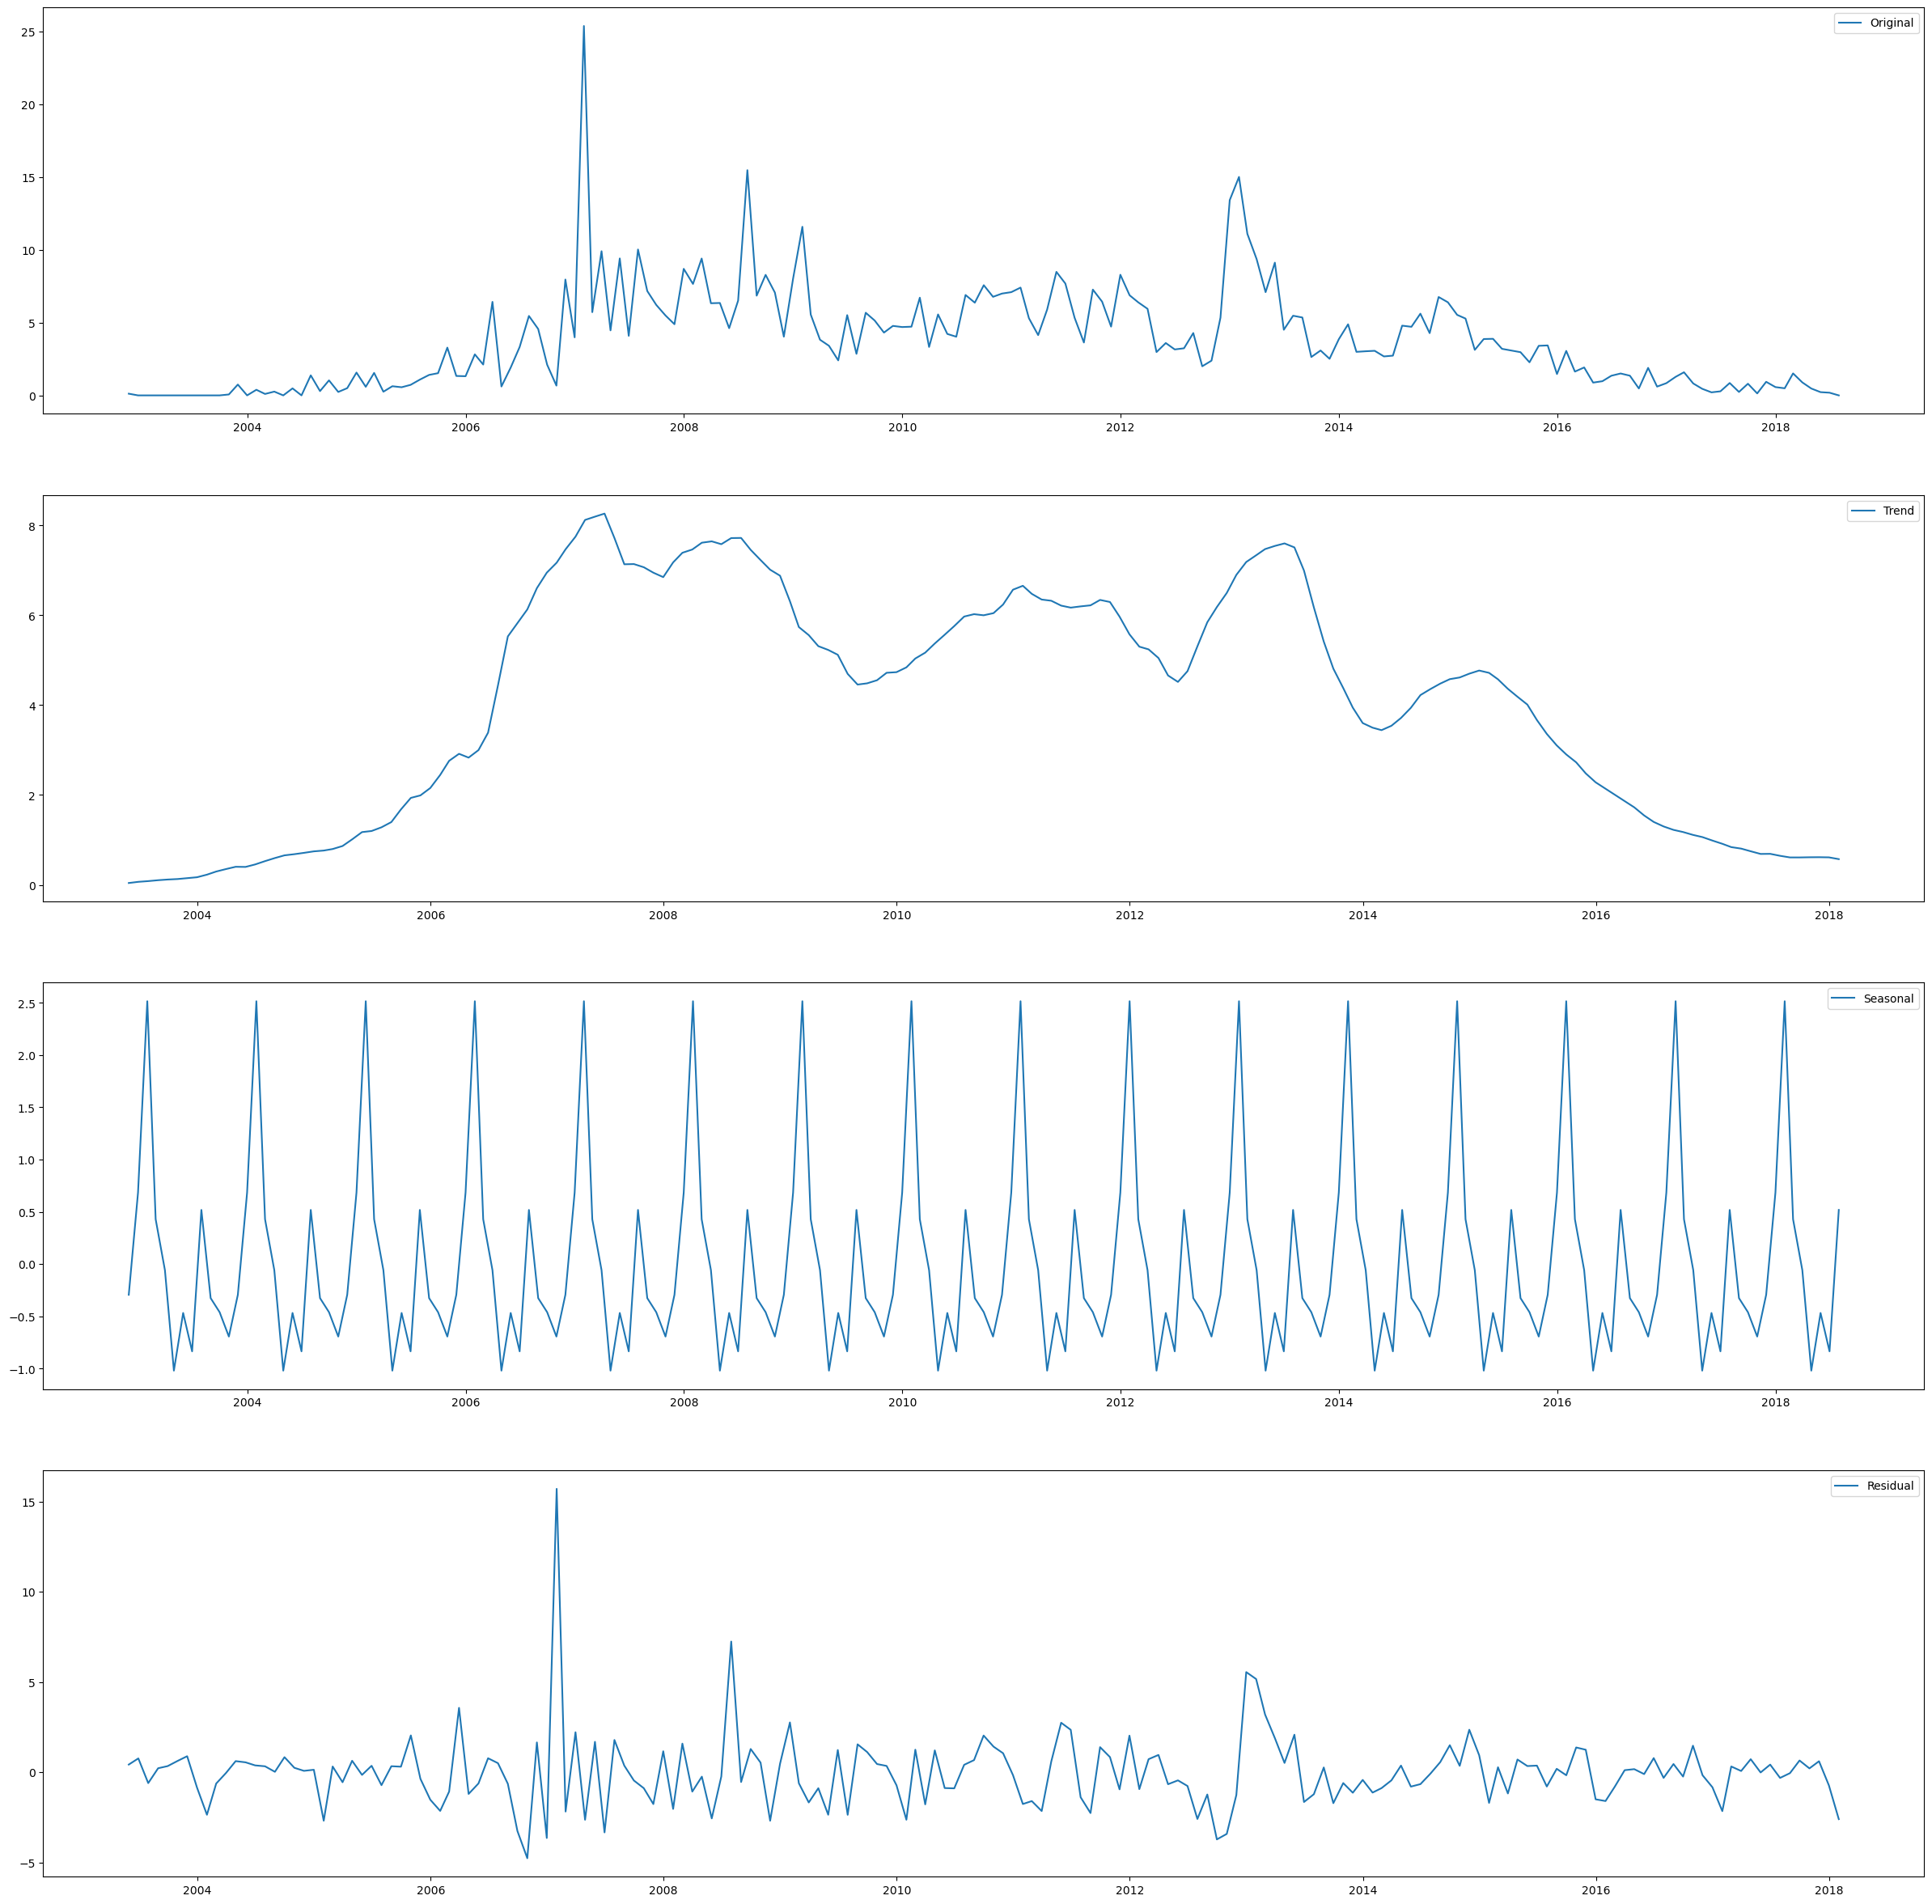

In [122]:
fig,ax = plt.subplots(4,2,figsize=(30,30))

plt.subplot(411)
plt.plot(ph['neg'],label='Original')
plt.legend()

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend();

In [123]:
# Checking Stationarity of positive Sentiment Column
checkstationary(ph['pos'])

'Pvalue:0.657388240312729.Data is not stationary, make data stationary'

In [124]:
# Checking Stationarity of neutral Sentiment Column
checkstationary(ph['neu'])

'Pvalue:0.6319158050268741.Data is not stationary, make data stationary'

In [125]:
# Checking Stationarity of Negative Sentiment Column
checkstationary(ph['neg'])

'Pvalue:0.21863127251572634.Data is not stationary, make data stationary'

### Calculate rolling mean and subtract it from the data

In [126]:
rolling_mean = ph['pos'].rolling(window=3).mean()
df_trend = ph['pos'] - rolling_mean
df_trend.dropna(inplace=True)

# Calculate seasonal component and subtract it from the data
df_seasonal = ph['pos'] - df_trend
df_seasonal.dropna(inplace=True)
# First order differencing
df_diff = df_seasonal.diff().dropna()

In [127]:
rolling_mean1 = ph['neu'].rolling(window=3).mean()
df_trend1 = ph['neu'] - rolling_mean1
df_trend1.dropna(inplace=True)

# Calculate seasonal component and subtract it from the data
df_seasonal1 = ph['neu'] - df_trend1
df_seasonal1.dropna(inplace=True)

# First order differencing
df_diff1 = df_seasonal1.diff().dropna()

In [128]:
rolling_mean2 = ph['neg'].rolling(window=3).mean()
df_trend2 = ph['neg'] - rolling_mean2
df_trend2.dropna(inplace=True)

# Calculate seasonal component and subtract it from the data
df_seasonal2 = ph['neg'] - df_trend2
df_seasonal2.dropna(inplace=True)

# First order differencing
df_diff2 = df_seasonal2.diff().dropna()

### check stationarity for positive column

In [129]:
checkstationary(df_diff)

'Pvalue:2.456784665563307e-06. Data is stationary, Proceed to model building'

### check stationarity for neutral column

In [130]:
checkstationary(df_diff1)

'Pvalue:1.1649450283128314e-06. Data is stationary, Proceed to model building'

### check stationarity for negative column

In [131]:
checkstationary(df_diff2)

'Pvalue:1.636234870149966e-05. Data is stationary, Proceed to model building'

In [132]:
df_time_ph = pd.concat([df_diff, df_diff1, df_diff2], axis=1, keys=['pos','neu','neg'])
df_time_ph.head()

pos           neu    neg
reviewTime                               
2003-02-28 -0.071333 -2.230000e-01 -0.039
2003-03-31  0.000000  0.000000e+00  0.000
2003-04-30 -0.240667 -9.266667e-02  0.000
2003-05-31  0.266333  4.003333e-01  0.000
2003-06-30  0.000000 -5.551115e-17  0.000

###  ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) For positive

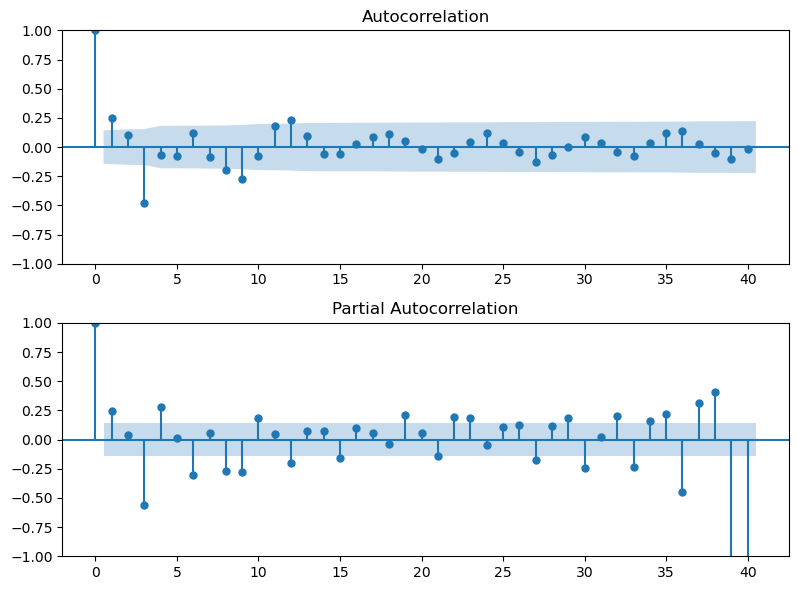

In [133]:
fig = plt.figure(figsize=(8, 6))

# Show ACF
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(df_time_ph['pos'], lags=40, ax=ax1)

# Show PACF
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(df_time_ph['pos'], lags=40, ax=ax2)

plt.tight_layout()

###  ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) For neutral

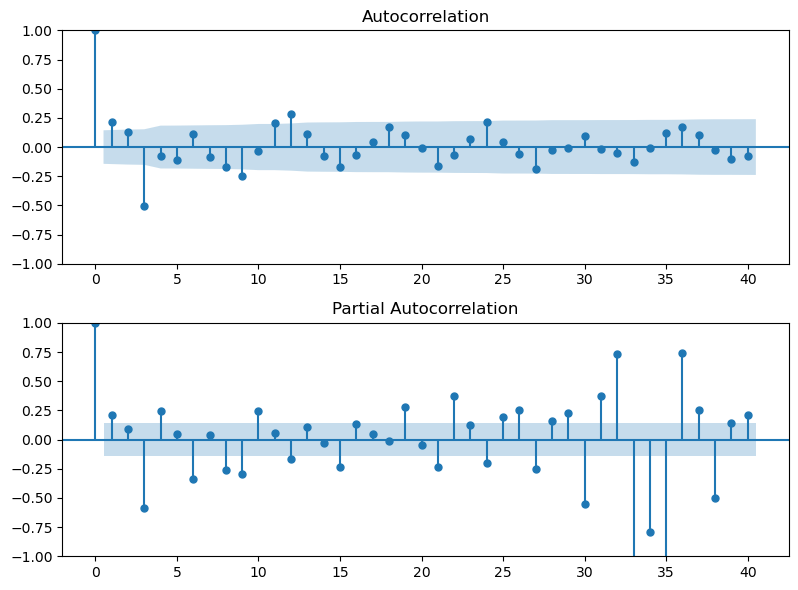

In [134]:
fig = plt.figure(figsize=(8, 6))

# Show ACF
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(df_time_ph['neu'], lags=40, ax=ax1)

# Show PACF
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(df_time_ph['neu'], lags=40, ax=ax2)

plt.tight_layout()

###  ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) For negative

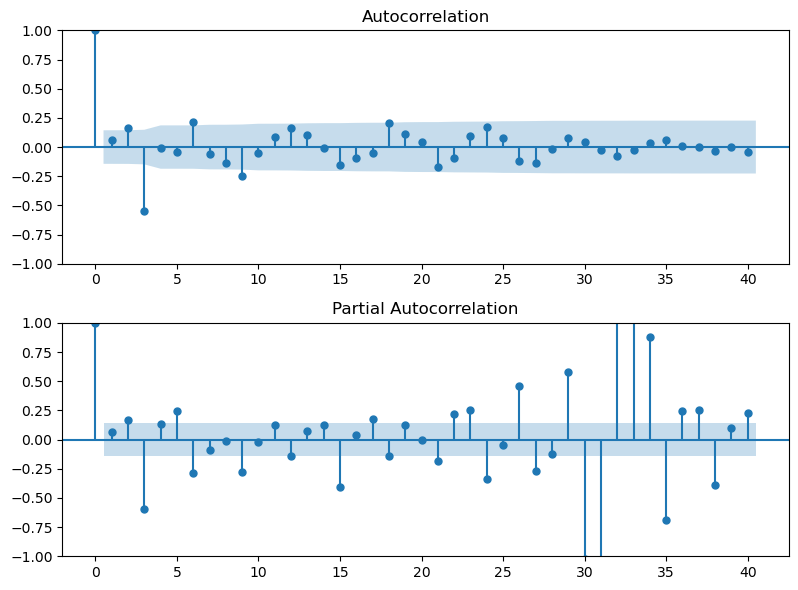

In [135]:
fig = plt.figure(figsize=(8, 6))

# Show ACF
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(df_time_ph['neg'], lags=40, ax=ax1)

# Show PACF
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(df_time_ph['neg'], lags=40, ax=ax2)

plt.tight_layout()

### Creating function to get optimum p and q value

### For positive column

In [136]:
import pmdarima as pm

# fit ARIMA model using auto_arima
model = pm.auto_arima(df_time_ph['pos'], start_p=1, start_q=1, max_p=5, max_q=5,
                      seasonal=False, trace=True, error_action='ignore', 
                      suppress_warnings=True, stepwise=True)

# print summary
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1123.690, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1131.437, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1121.746, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1124.656, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1123.445, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1103.570, Time=0.33 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1052.875, Time=0.25 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1059.818, Time=0.10 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=1050.293, Time=0.31 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=1048.310, Time=0.14 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=1050.258, Time=0.16 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=1046.202, Time=0.42 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=1038.191, Time=0.43 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=1014.416, Time=0.46 sec
 ARIMA(3,0,2)(0,0,0)[0]          

### For neutral column

In [137]:
# fit ARIMA model using auto_arima
model1 = pm.auto_arima(df_time_ph['neu'], start_p=1, start_q=1, max_p=5, max_q=5,
                      seasonal=False, trace=True, error_action='ignore', 
                      suppress_warnings=True, stepwise=True)

# print summary
print(model1.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1333.097, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1337.920, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1331.332, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1333.714, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1331.857, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1308.093, Time=0.14 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1254.835, Time=0.19 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1259.453, Time=0.14 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=1253.350, Time=0.21 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=1251.444, Time=0.21 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=1253.094, Time=0.12 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=1247.684, Time=0.27 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=inf, Time=0.65 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=0.56 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=1

### For negative column

In [138]:
# fit ARIMA model using auto_arima
model1 = pm.auto_arima(df_time_ph['neg'], start_p=1, start_q=1, max_p=5, max_q=5,
                      seasonal=False, trace=True, error_action='ignore', 
                      suppress_warnings=True, stepwise=True)

# print summary
print(model1.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=597.856, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=594.830, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=596.130, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=596.322, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=596.830, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.250 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  186
Model:                        SARIMAX   Log Likelihood                -296.415
Date:                Thu, 13 Apr 2023   AIC                            594.830
Time:                        13:09:10   BIC                            598.055
Sample:                    02-28-2003   HQIC                           596.137
                         - 07-31-2018                                         
Co

### Splitting the data

In [139]:
split = int(0.95 * len(df_time_ph))
train = df_time_ph.iloc[:split]
test = df_time_ph.iloc[split:]
print("Train = {}, Test = {}".format(len(train), len(test)))

Train = 176, Test = 10


### Model building

### Creating function for sarima model for positive sentiment

In [140]:
def SARMA1(df):
    model2 = SARIMAX(train['pos'],order=(3, 0, 2),seasonal_order=(3,0,2,12)).fit()
    print('Summary : S')
    print('past_predictions : past')
    print('future_predictions : future')
    select = input('Enter you requried information: ')
    summary  = model2.summary()
    pred1 = model2.predict()
    forecast1 = model2.forecast(len(test['pos'])+20)
    if select == 'S':
        return summary
    elif select == 'past':
        return pred1
    else:
        return forecast1

### Creating function for sarima model for neutral sentiment

In [141]:
def SARMA2(df):
    model2 = SARIMAX(train['neu'],order=(5, 0, 1),seasonal_order=(5,0,1,12)).fit()
    print('Summary : S')
    print('past_predictions : past')
    print('future_predictions : future')
    select = input('Enter you requried information: ')
    summary  = model2.summary()
    pred1 = model2.predict()
    forecast1 = model2.forecast(len(test['neu'])+20)
    if select == 'S':
        return summary
    elif select == 'past':
        return pred1
    else:
        return forecast1

### Creating function for sarima model for negative sentiment

In [142]:
def SARMA3(df):
    model2 = SARIMAX(train['neg'],order=(0, 0, 0),seasonal_order=(0,0,0,12)).fit()
    print('Summary : S')
    print('past_predictions : past')
    print('future_predictions : future')
    select = input('Enter you requried information: ')
    summary  = model2.summary()
    pred1 = model2.predict()
    forecast1 = model2.forecast(len(test['neg'])+20)
    if select == 'S':
        return summary
    elif select == 'past':
        return pred1
    else:
        return forecast1

In [143]:
train1 = SARMA1(train['pos'])

Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: df


In [144]:
train2 = SARMA2(train['neu'])

Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: df


In [145]:
train3 = SARMA3(train['neg'])

Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: df


## Plot graph Actual vs forecast for positive

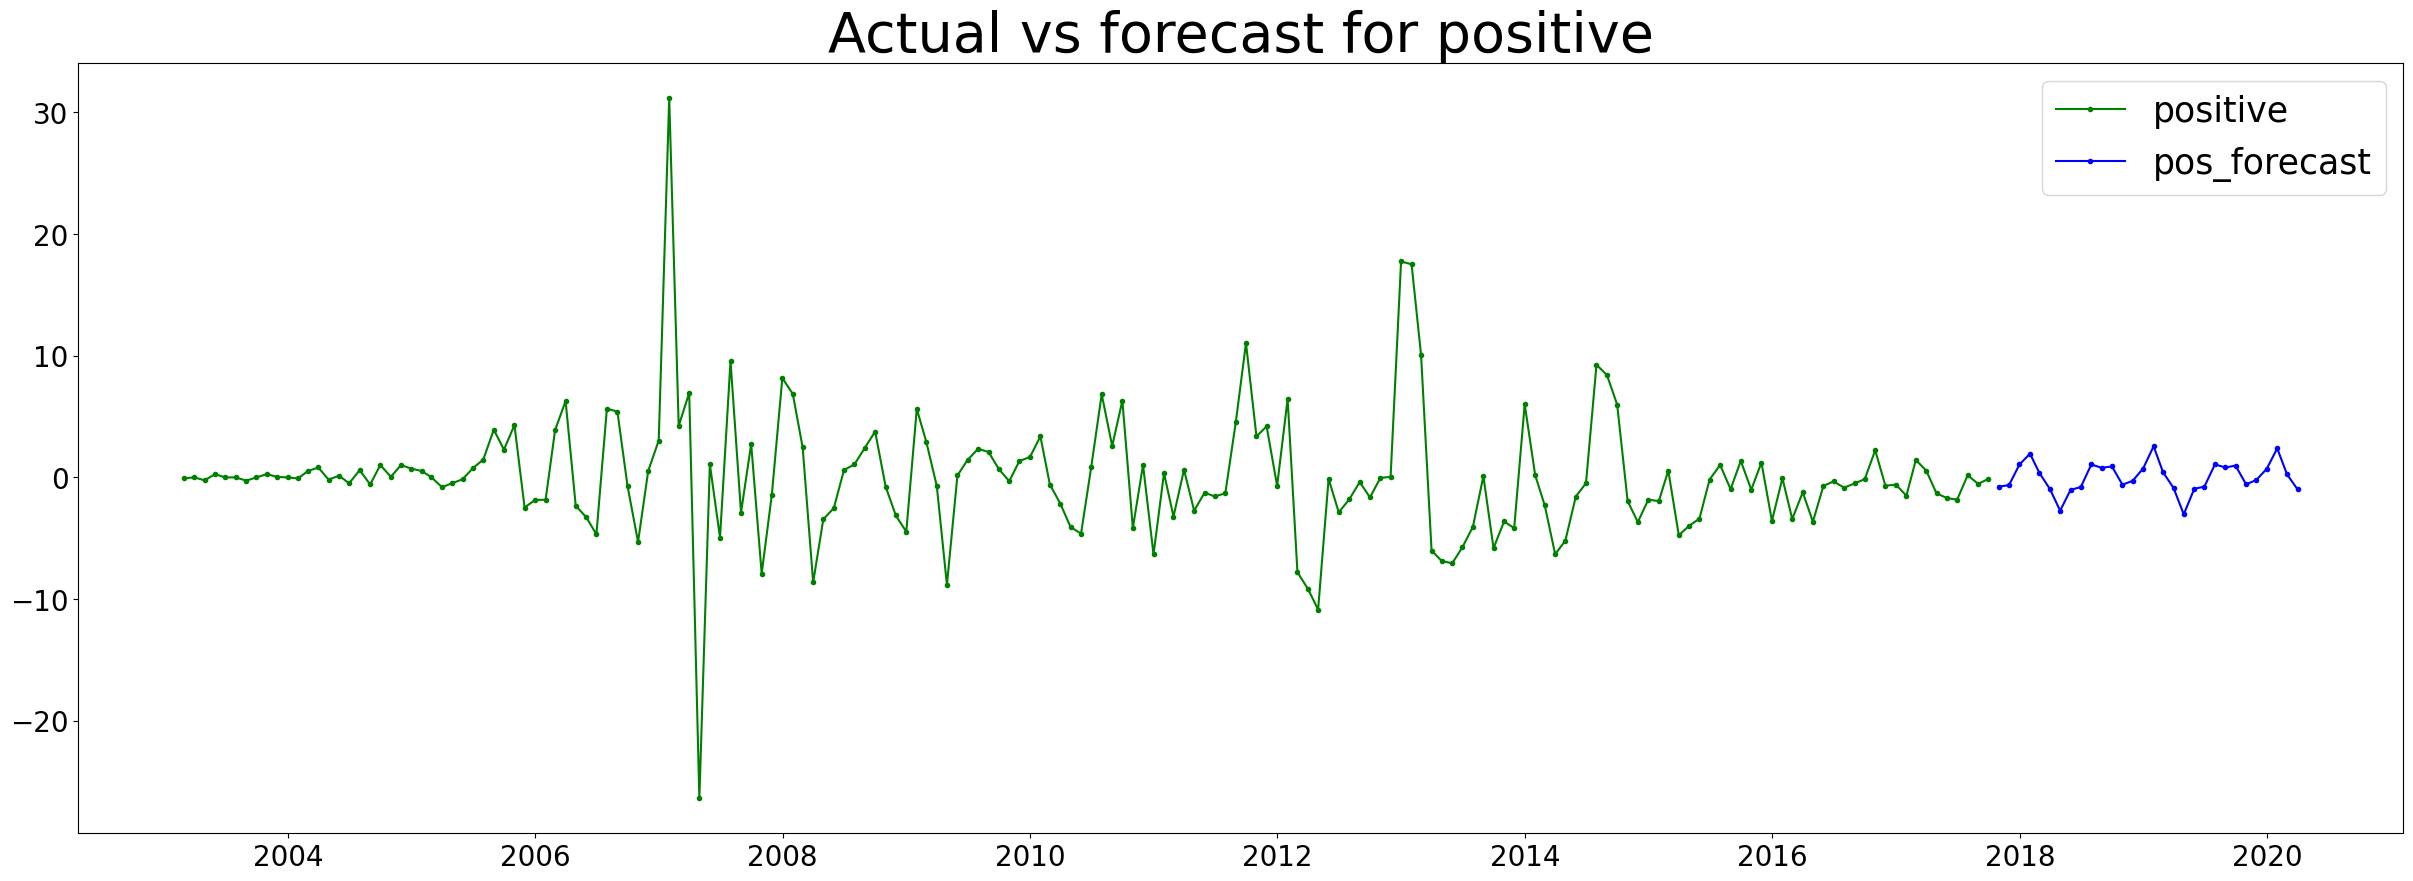

In [146]:
plt.figure(figsize=(30,10))
plt.title('Actual vs forecast for positive',fontsize=40)
plt.plot(train['pos'],marker = '.', label = 'positive', color = 'g')
plt.plot(train1,marker = '.', label = 'pos_forecast', color = 'b')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=25);

## Plot graph Actual vs forecast for neutral

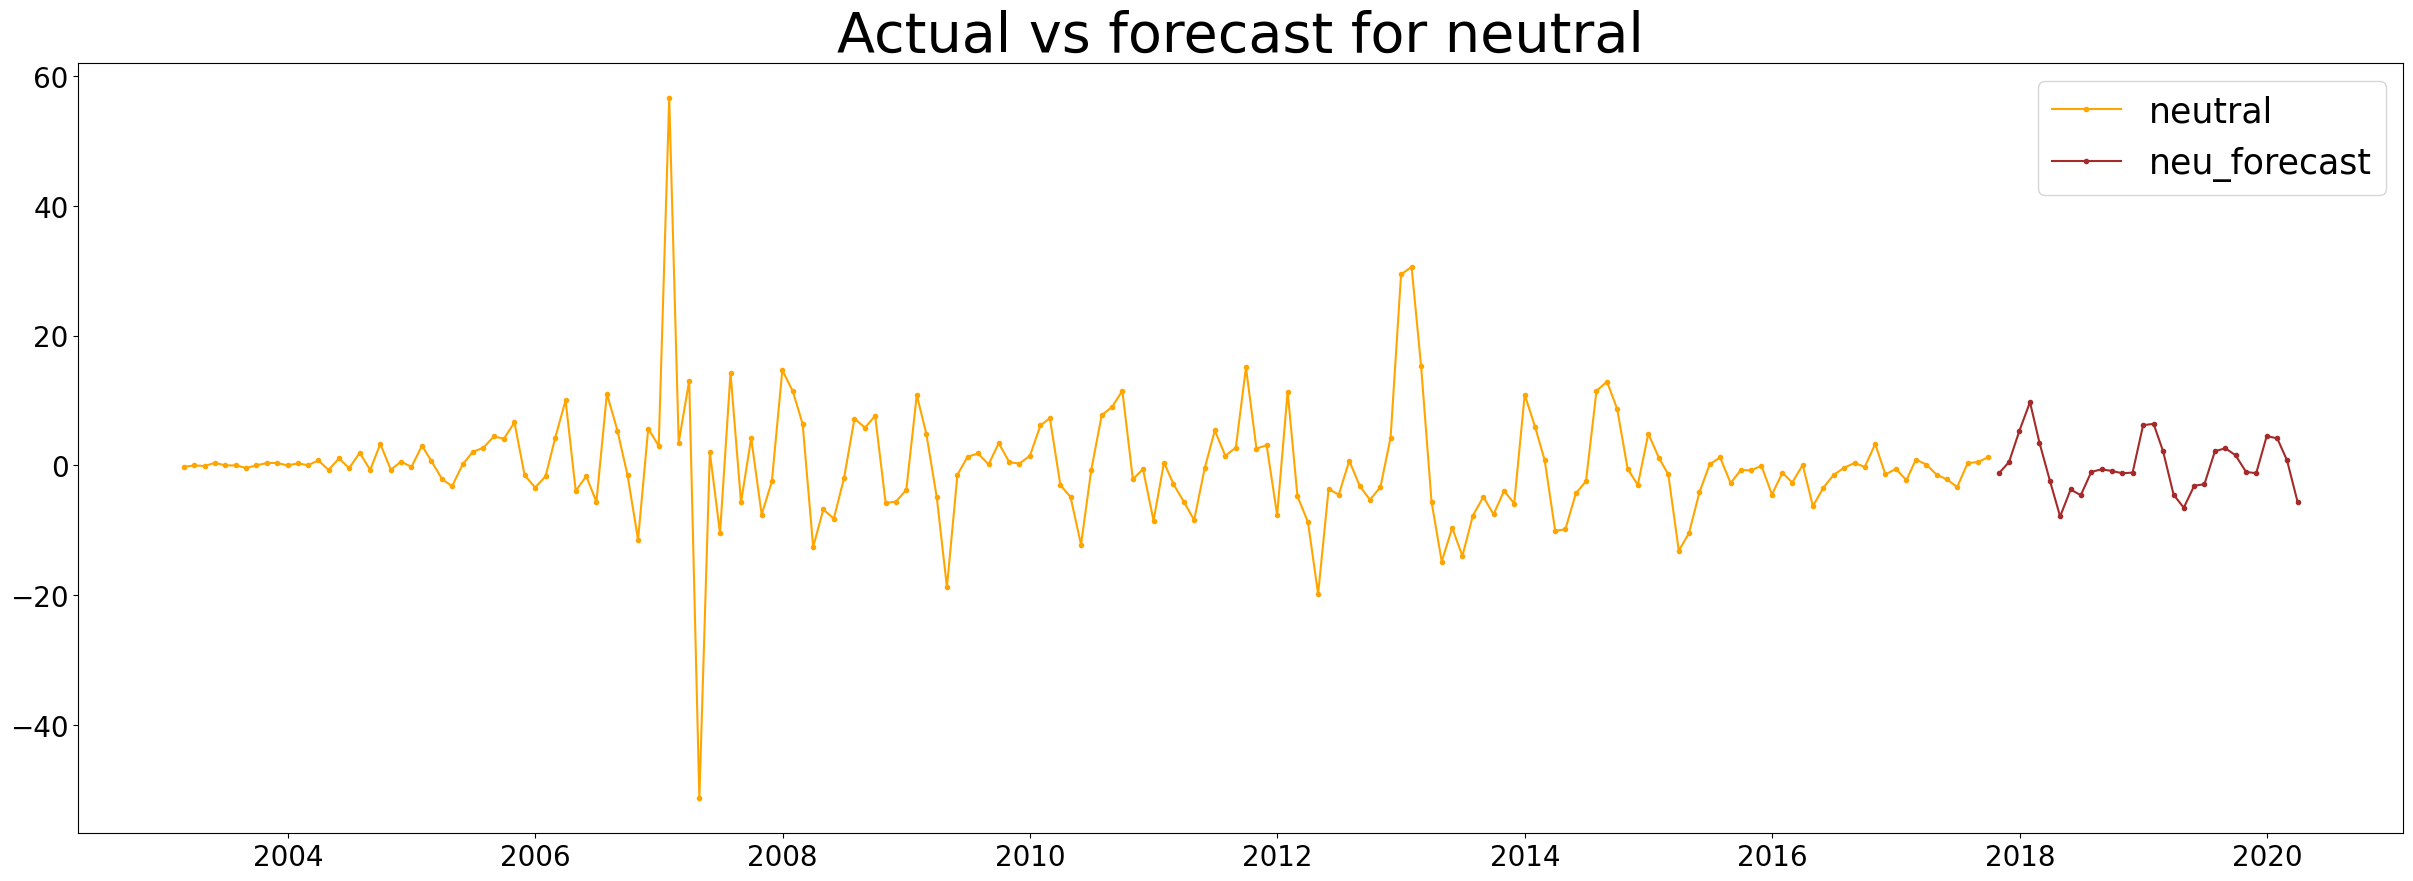

In [147]:
plt.figure(figsize=(30,10))
plt.title('Actual vs forecast for neutral',fontsize=40)
plt.plot(train['neu'],marker = '.', label = 'neutral', color = 'orange')
plt.plot(train2,marker = '.', label = 'neu_forecast', color = 'brown')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=25);

## Plot graph Actual vs forecast for negative

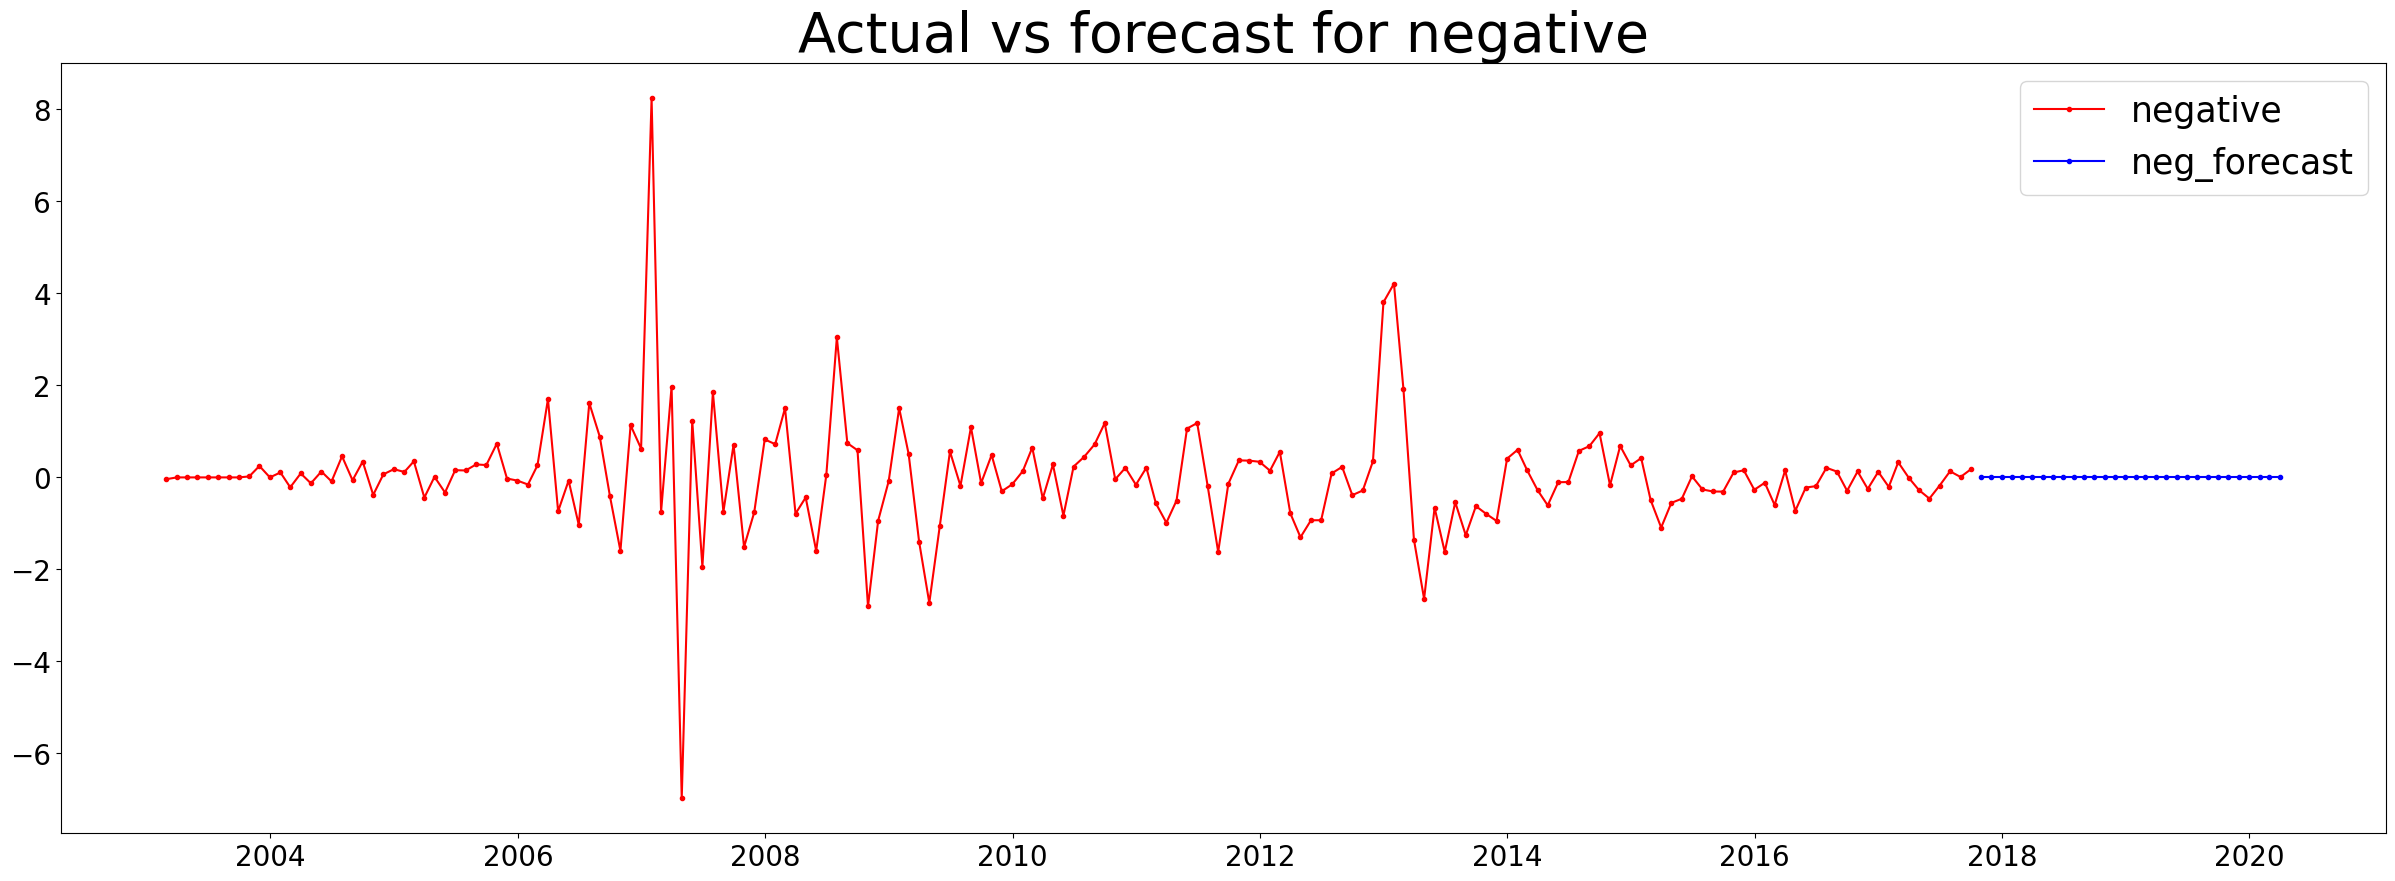

In [148]:
plt.figure(figsize=(30,10))
plt.title('Actual vs forecast for negative',fontsize=40)
plt.plot(train['neg'],marker = '.', label = 'negative', color = 'red')
plt.plot(train3,marker = '.', label = 'neg_forecast', color = 'b')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=25);